<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-7/Act3_7_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.6: Extraccion de Características (Airbnb - Boston)
## Generación del Frame

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar un archivo
from google.colab import files
files.upload()

In [ ]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Crear DataFrame
data = pd.read_csv('boston_listings_clean.csv',encoding='utf-8')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.shape

(4325, 61)

In [ ]:
#Se corrobora que no haya valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

,0
last_scraped,0
source,0
name,0
description,0
host_name,0
host_since,0
host_location,0
host_response_time,0
host_is_superhost,0
host_verifications,0


## Regresión Lineal Simple

Para analizar la Regresión Lineal Simple de la base de datos, se llevara a cabo un análisis de la correlación que existe en cuatro tipos de habitación ('room_type') respecto a las siguientes variables:

“host_acceptance_rate vs host_response_rate”

“review_scores_location vs review_scores_cleanliness”

“host_acceptance_rate vs price”

“availability_365 vs number_of_reviews”

“host_acceptance_rate vs number_of_reviews ”

“reviews_per_month vs review_scores_communication”

Cada una se lee de la forma 'dependiente vs independiente' para la realización del modelo.

A partir de los resultados obtenidos, estos se almacenaran en una tabla y se creara el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.

In [ ]:
#Libreria para definir model como la función de regresión lineal
from sklearn.linear_model import LinearRegression

### Entire home/apt

In [ ]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_entire = data[data['room_type'] == 'Entire home/apt']
data_entire.shape

(2950, 61)

#### Variables 1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A1 = data_entire[['host_response_rate']]
var_dep_A1 = data_entire['host_acceptance_rate']

In [ ]:
model_A1 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_A1.fit(X=vars_indep_A1, y=var_dep_A1)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_A1 = model_A1.predict(X=data_entire[['host_response_rate']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(0,'predicciones_1',y_pred_A1)
data_entire.head(3)

,predicciones_1,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,96.663715,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,97.555310,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,97.555310,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

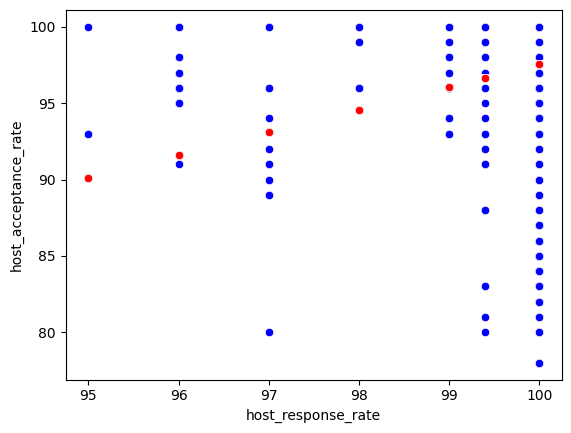

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_entire)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_entire)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A1 = model_A1.score(X=vars_indep_A1, y=var_dep_A1)
coef_deter_A1

0.15709605779612446

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A1 = np.sqrt(coef_deter_A1)
coef_correl_A1

0.3963534505919236

#### Variables 2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A2 = data_entire[['review_scores_cleanliness']]
var_dep_A2 = data_entire['review_scores_location']

In [ ]:
model_A2 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_A2.fit(X=vars_indep_A2, y=var_dep_A2)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_A2 = model_A2.predict(X=data_entire[['review_scores_cleanliness']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(1,'predicciones_2',y_pred_A2)
data_entire.head(3)

,predicciones_1,predicciones_2,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,96.663715,4.884085,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,97.555310,4.867093,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,97.555310,4.858597,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

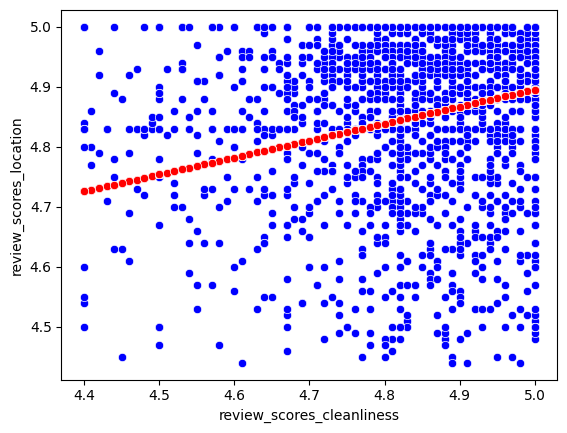

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_entire)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_entire)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A2 = model_A2.score(X=vars_indep_A2, y=var_dep_A2)
coef_deter_A2

0.08643607950033505

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A2 = np.sqrt(coef_deter_A2)
coef_correl_A2

0.29400013520462037

#### Variables 3

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A3 = data_entire[['price']]
var_dep_A3 = data_entire['host_acceptance_rate']

In [ ]:
model_A3 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_A3.fit(X=vars_indep_A3, y=var_dep_A3)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_A3 = model_A3.predict(X=data_entire[['price']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(2,'predicciones_3',y_pred_A3)
data_entire.head(3)

,predicciones_1,predicciones_2,predicciones_3,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,96.663715,4.884085,96.650674,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,97.555310,4.867093,96.677523,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,97.555310,4.858597,96.754236,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

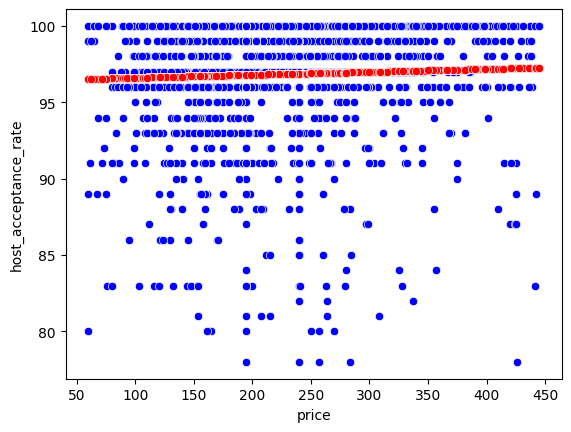

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_entire)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_entire)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A3 = model_A3.score(X=vars_indep_A3, y=var_dep_A3)
coef_deter_A3

0.0012821831043761112

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A3 = np.sqrt(coef_deter_A3)
coef_correl_A3

0.03580758445324274

#### Variables 4

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A4 = data_entire[['number_of_reviews']]
var_dep_A4 = data_entire['availability_365']

In [ ]:
model_A4 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_A4.fit(X=vars_indep_A4, y=var_dep_A4)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_A4 = model_A4.predict(X=data_entire[['number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(3,'predicciones_4',y_pred_A4)
data_entire.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,96.663715,4.884085,96.650674,194.427086,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,97.555310,4.867093,96.677523,197.059911,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,97.555310,4.858597,96.754236,197.059911,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

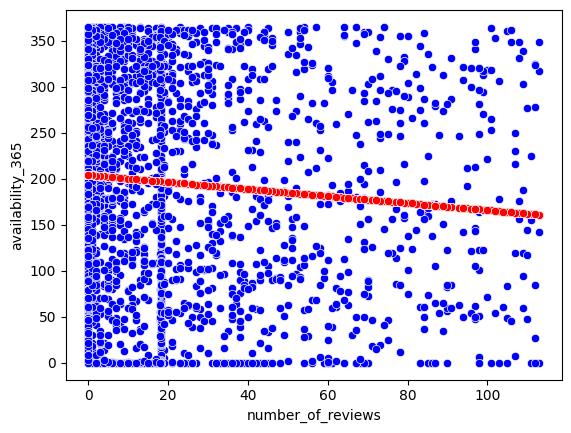

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_entire)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_entire)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A4 = model_A4.score(X=vars_indep_A4, y=var_dep_A4)
coef_deter_A4

0.006064383250241168

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A4 = np.sqrt(coef_deter_A4)
coef_correl_A4

0.07787415007716725

#### Variables 5

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A5 = data_entire[['number_of_reviews']]
var_dep_A5 = data_entire['host_acceptance_rate']

In [ ]:
model_A5 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_A5.fit(X=vars_indep_A5, y=var_dep_A5)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_A5 = model_A5.predict(X=data_entire[['number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(4,'predicciones_5',y_pred_A5)
data_entire.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,96.663715,4.884085,96.650674,194.427086,96.976447,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,97.555310,4.867093,96.677523,197.059911,96.820070,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,97.555310,4.858597,96.754236,197.059911,96.820070,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

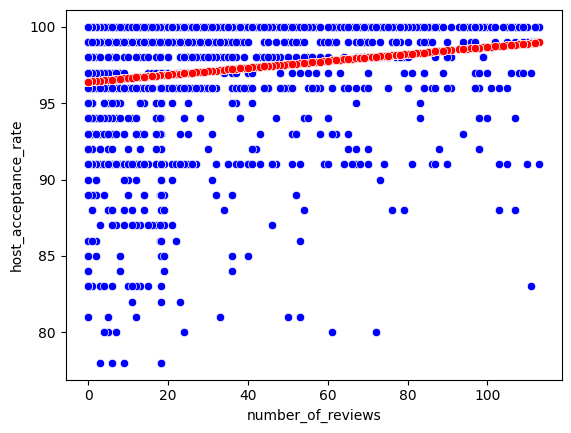

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_entire)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_entire)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A5 = model_A5.score(X=vars_indep_A5, y=var_dep_A5)
coef_deter_A5

0.02315033157356905

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A5 = np.sqrt(coef_deter_A5)
coef_correl_A5

0.15215233016148338

#### Variables 6

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A6 = data_entire[['review_scores_communication']]
var_dep_A6 = data_entire['reviews_per_month']

In [ ]:
model_A6 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_A6.fit(X=vars_indep_A6, y=var_dep_A6)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_A6 = model_A6.predict(X=data_entire[['review_scores_communication']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(5,'predicciones_6',y_pred_A6)
data_entire.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,96.663715,4.884085,96.650674,194.427086,96.976447,1.357465,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Frank,2008-12-03,"Massachusetts, United States",within a day,t,"['email', 'phone']",t,f,East Boston,Entire rental unit,Entire home/apt,1 bath,"[""Central air conditioning"", ""Free street park...",t,2024-06-22,2015-07-10,2023-12-11,f,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,97.555310,4.867093,96.677523,197.059911,96.820070,1.470331,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire guest suite,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-03-21,2024-04-24,f,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,97.555310,4.858597,96.754236,197.059911,96.820070,1.373588,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...",Terry,2009-02-19,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Roxbury,Entire condo,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2009-08-06,2024-04-16,f,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

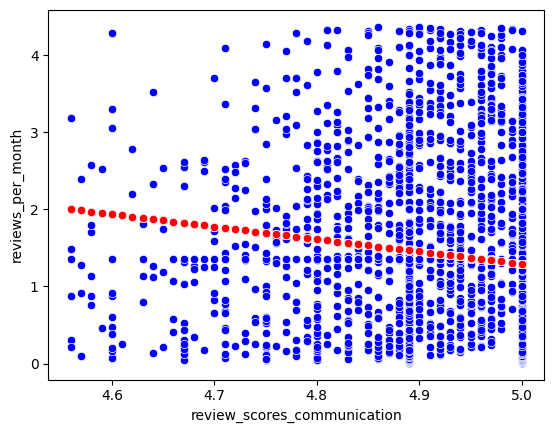

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_entire)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_entire)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A6 = model_A6.score(X=vars_indep_A6, y=var_dep_A6)
coef_deter_A6

0.02078190665162838

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A6 = np.sqrt(coef_deter_A6)
coef_correl_A6

0.1441593099720874

#### Tabla de Coeficientes de Determinación y Correlación

In [ ]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_A1,coef_deter_A2,coef_deter_A3,coef_deter_A4,coef_deter_A5,coef_deter_A6],
             'Coef_Correl':[coef_correl_A1,coef_correl_A2,coef_correl_A3,coef_correl_A4,coef_correl_A5,coef_correl_A6]}

#Generar con llaves
df_coef_A = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_A

,Coef_Deter,Coef_Correl
Var1,0.157096,0.396353
Var2,0.086436,0.294000
Var3,0.001282,0.035808
Var4,0.006064,0.077874
Var5,0.023150,0.152152
Var6,0.020782,0.144159


### Private room

In [ ]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_private = data[data['room_type'] == 'Private room']
data_private.shape

(1313, 61)

#### Variables 1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B1 = data_private[['host_response_rate']]
var_dep_B1 = data_private['host_acceptance_rate']

In [ ]:
model_B1 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_B1.fit(X=vars_indep_B1, y=var_dep_B1)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_B1 = model_B1.predict(X=data_private[['host_response_rate']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(0,'predicciones_1',y_pred_B1)
data_private.head(3)

,predicciones_1,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
9,95.021415,2024-06-22,city scrape,Private room & bath - Jamaica Plain,Private bedroom and bathroom in my house in Ja...,Robert,2010-07-20,"Boston, MA",within a few hours,t,"['email', 'phone', 'work_email']",t,t,Jamaica Plain,Private room in home,Private room,1.5 baths,"[""Laundromat nearby"", ""Hammock"", ""Central air ...",t,2024-06-22,2010-08-27,2024-05-05,f,2.0,1.0,1.0,1.0,0,0.0,4.98,4.95,5.00,4.97,4.94,4.93,4.93,0.0,0.59,100.0,78.00,42.31347,-71.11082,29.0,19.0,29.0,28.6,10,19,113,5.0,1.0,0.0,1.0,1.0,1.0,100.0,120,99.0,174986,120.0,120.0,120.0
11,95.021415,2024-06-22,city scrape,"Private Room, shared bath in Victorian House/ 1","Location: Beautiful house, convenient and safe...",Hermina,2010-05-05,"Boston, MA",within an hour,f,"['email', 'phone', 'work_email']",t,t,Dorchester,Private room in home,Private room,1.5 shared baths,"[""Smoke alarm"", ""Shampoo"", ""Hangers"", ""Essenti...",t,2024-06-22,2010-09-08,2023-11-05,f,2.0,1.0,3.0,3.0,13,0.0,4.45,4.53,4.44,4.71,4.71,4.83,4.51,0.0,1.98,100.0,89.00,42.29871,-71.05954,1.0,1.0,1.0,1.0,43,73,348,1.0,8.0,2.0,6.0,8.0,8.0,100.0,365,18.1,119019,365.0,365.0,365.0
12,95.021415,2024-06-22,city scrape,Room in geographical heart of Hub,"Small, sunny, private room in quiet but urban ...",Michelle,2010-10-06,"Boston, MA",within a few hours,t,"['email', 'phone']",t,t,Roxbury,Private room in rental unit,Private room,1 shared bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2011-01-01,2024-02-29,f,1.0,1.0,1.0,1.0,0,0.0,4.73,4.65,4.57,4.87,4.91,4.83,4.63,0.0,0.88,100.0,96.02,42.32546,-71.08894,29.0,29.0,29.0,29.0,20,50,139,2.0,5.0,1.0,4.0,5.0,6.0,80.0,29,18.1,255183,29.0,29.0,29.0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

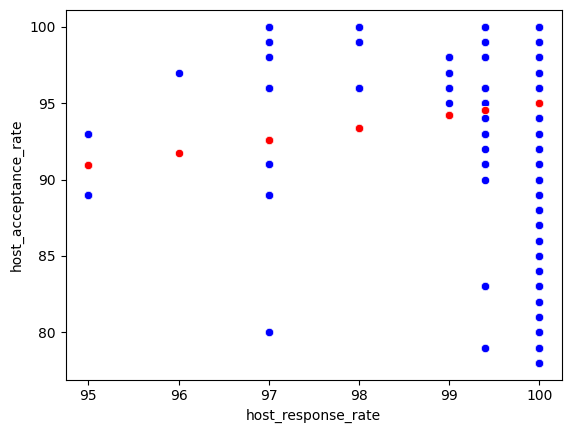

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_private)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_private)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B1 = model_B1.score(X=vars_indep_B1, y=var_dep_B1)
coef_deter_B1

0.040756123659840604

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B1 = np.sqrt(coef_deter_B1)
coef_correl_B1

0.20188145942567534

#### Variables 2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B2 = data_private[['review_scores_cleanliness']]
var_dep_B2 = data_private['review_scores_location']

In [ ]:
model_B2 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_B2.fit(X=vars_indep_B2, y=var_dep_B2)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_B2 = model_B2.predict(X=data_private[['review_scores_cleanliness']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(1,'predicciones_2',y_pred_B2)
data_private.head(3)

,predicciones_1,predicciones_2,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
9,95.021415,4.845969,2024-06-22,city scrape,Private room & bath - Jamaica Plain,Private bedroom and bathroom in my house in Ja...,Robert,2010-07-20,"Boston, MA",within a few hours,t,"['email', 'phone', 'work_email']",t,t,Jamaica Plain,Private room in home,Private room,1.5 baths,"[""Laundromat nearby"", ""Hammock"", ""Central air ...",t,2024-06-22,2010-08-27,2024-05-05,f,2.0,1.0,1.0,1.0,0,0.0,4.98,4.95,5.00,4.97,4.94,4.93,4.93,0.0,0.59,100.0,78.00,42.31347,-71.11082,29.0,19.0,29.0,28.6,10,19,113,5.0,1.0,0.0,1.0,1.0,1.0,100.0,120,99.0,174986,120.0,120.0,120.0
11,95.021415,4.708764,2024-06-22,city scrape,"Private Room, shared bath in Victorian House/ 1","Location: Beautiful house, convenient and safe...",Hermina,2010-05-05,"Boston, MA",within an hour,f,"['email', 'phone', 'work_email']",t,t,Dorchester,Private room in home,Private room,1.5 shared baths,"[""Smoke alarm"", ""Shampoo"", ""Hangers"", ""Essenti...",t,2024-06-22,2010-09-08,2023-11-05,f,2.0,1.0,3.0,3.0,13,0.0,4.45,4.53,4.44,4.71,4.71,4.83,4.51,0.0,1.98,100.0,89.00,42.29871,-71.05954,1.0,1.0,1.0,1.0,43,73,348,1.0,8.0,2.0,6.0,8.0,8.0,100.0,365,18.1,119019,365.0,365.0,365.0
12,95.021415,4.740615,2024-06-22,city scrape,Room in geographical heart of Hub,"Small, sunny, private room in quiet but urban ...",Michelle,2010-10-06,"Boston, MA",within a few hours,t,"['email', 'phone']",t,t,Roxbury,Private room in rental unit,Private room,1 shared bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2011-01-01,2024-02-29,f,1.0,1.0,1.0,1.0,0,0.0,4.73,4.65,4.57,4.87,4.91,4.83,4.63,0.0,0.88,100.0,96.02,42.32546,-71.08894,29.0,29.0,29.0,29.0,20,50,139,2.0,5.0,1.0,4.0,5.0,6.0,80.0,29,18.1,255183,29.0,29.0,29.0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

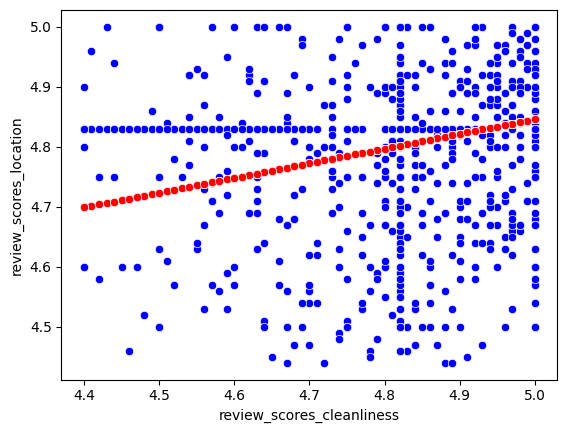

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_private)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_private)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B2 = model_B2.score(X=vars_indep_B2, y=var_dep_B2)
coef_deter_B2

0.07207200046151196

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B2 = np.sqrt(coef_deter_B2)
coef_correl_B2

0.2684622887139122

#### Variables 3

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B3 = data_private[['price']]
var_dep_B3 = data_private['host_acceptance_rate']

In [ ]:
model_B3 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_B3.fit(X=vars_indep_B3, y=var_dep_B3)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_B3 = model_B3.predict(X=data_private[['price']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(2,'predicciones_3',y_pred_B3)
data_private.head(3)

,predicciones_1,predicciones_2,predicciones_3,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
9,95.021415,4.845969,94.474792,2024-06-22,city scrape,Private room & bath - Jamaica Plain,Private bedroom and bathroom in my house in Ja...,Robert,2010-07-20,"Boston, MA",within a few hours,t,"['email', 'phone', 'work_email']",t,t,Jamaica Plain,Private room in home,Private room,1.5 baths,"[""Laundromat nearby"", ""Hammock"", ""Central air ...",t,2024-06-22,2010-08-27,2024-05-05,f,2.0,1.0,1.0,1.0,0,0.0,4.98,4.95,5.00,4.97,4.94,4.93,4.93,0.0,0.59,100.0,78.00,42.31347,-71.11082,29.0,19.0,29.0,28.6,10,19,113,5.0,1.0,0.0,1.0,1.0,1.0,100.0,120,99.0,174986,120.0,120.0,120.0
11,95.021415,4.708764,94.474792,2024-06-22,city scrape,"Private Room, shared bath in Victorian House/ 1","Location: Beautiful house, convenient and safe...",Hermina,2010-05-05,"Boston, MA",within an hour,f,"['email', 'phone', 'work_email']",t,t,Dorchester,Private room in home,Private room,1.5 shared baths,"[""Smoke alarm"", ""Shampoo"", ""Hangers"", ""Essenti...",t,2024-06-22,2010-09-08,2023-11-05,f,2.0,1.0,3.0,3.0,13,0.0,4.45,4.53,4.44,4.71,4.71,4.83,4.51,0.0,1.98,100.0,89.00,42.29871,-71.05954,1.0,1.0,1.0,1.0,43,73,348,1.0,8.0,2.0,6.0,8.0,8.0,100.0,365,18.1,119019,365.0,365.0,365.0
12,95.021415,4.740615,94.512013,2024-06-22,city scrape,Room in geographical heart of Hub,"Small, sunny, private room in quiet but urban ...",Michelle,2010-10-06,"Boston, MA",within a few hours,t,"['email', 'phone']",t,t,Roxbury,Private room in rental unit,Private room,1 shared bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2011-01-01,2024-02-29,f,1.0,1.0,1.0,1.0,0,0.0,4.73,4.65,4.57,4.87,4.91,4.83,4.63,0.0,0.88,100.0,96.02,42.32546,-71.08894,29.0,29.0,29.0,29.0,20,50,139,2.0,5.0,1.0,4.0,5.0,6.0,80.0,29,18.1,255183,29.0,29.0,29.0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

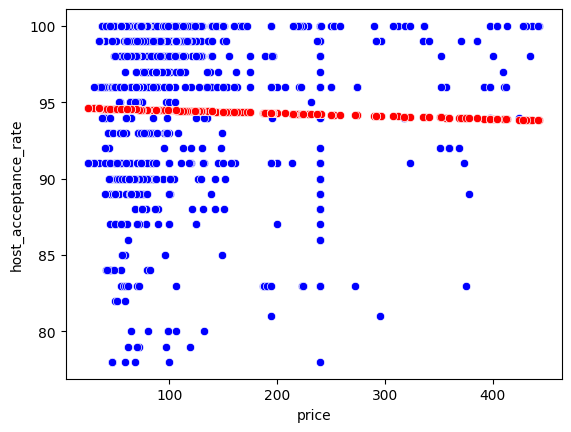

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_private)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_private)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B3 = model_B3.score(X=vars_indep_B3, y=var_dep_B3)
coef_deter_B3

0.0010817254049938496

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B3 = np.sqrt(coef_deter_B3)
coef_correl_B3

0.032889594174964364

#### Variables 4

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B4 = data_private[['number_of_reviews']]
var_dep_B4 = data_private['availability_365']

In [ ]:
model_B4 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_B4.fit(X=vars_indep_B4, y=var_dep_B4)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_B4 = model_B4.predict(X=data_private[['number_of_reviews']])
y_pred_B4

array([157.66172573, 181.28248124, 181.28248124, ..., 186.56722381,
       186.56722381, 186.56722381])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(3,'predicciones_4',y_pred_B4)
data_private.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
9,95.021415,4.845969,94.474792,157.661726,2024-06-22,city scrape,Private room & bath - Jamaica Plain,Private bedroom and bathroom in my house in Ja...,Robert,2010-07-20,"Boston, MA",within a few hours,t,"['email', 'phone', 'work_email']",t,t,Jamaica Plain,Private room in home,Private room,1.5 baths,"[""Laundromat nearby"", ""Hammock"", ""Central air ...",t,2024-06-22,2010-08-27,2024-05-05,f,2.0,1.0,1.0,1.0,0,0.0,4.98,4.95,5.00,4.97,4.94,4.93,4.93,0.0,0.59,100.0,78.00,42.31347,-71.11082,29.0,19.0,29.0,28.6,10,19,113,5.0,1.0,0.0,1.0,1.0,1.0,100.0,120,99.0,174986,120.0,120.0,120.0
11,95.021415,4.708764,94.474792,181.282481,2024-06-22,city scrape,"Private Room, shared bath in Victorian House/ 1","Location: Beautiful house, convenient and safe...",Hermina,2010-05-05,"Boston, MA",within an hour,f,"['email', 'phone', 'work_email']",t,t,Dorchester,Private room in home,Private room,1.5 shared baths,"[""Smoke alarm"", ""Shampoo"", ""Hangers"", ""Essenti...",t,2024-06-22,2010-09-08,2023-11-05,f,2.0,1.0,3.0,3.0,13,0.0,4.45,4.53,4.44,4.71,4.71,4.83,4.51,0.0,1.98,100.0,89.00,42.29871,-71.05954,1.0,1.0,1.0,1.0,43,73,348,1.0,8.0,2.0,6.0,8.0,8.0,100.0,365,18.1,119019,365.0,365.0,365.0
12,95.021415,4.740615,94.512013,181.282481,2024-06-22,city scrape,Room in geographical heart of Hub,"Small, sunny, private room in quiet but urban ...",Michelle,2010-10-06,"Boston, MA",within a few hours,t,"['email', 'phone']",t,t,Roxbury,Private room in rental unit,Private room,1 shared bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2011-01-01,2024-02-29,f,1.0,1.0,1.0,1.0,0,0.0,4.73,4.65,4.57,4.87,4.91,4.83,4.63,0.0,0.88,100.0,96.02,42.32546,-71.08894,29.0,29.0,29.0,29.0,20,50,139,2.0,5.0,1.0,4.0,5.0,6.0,80.0,29,18.1,255183,29.0,29.0,29.0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

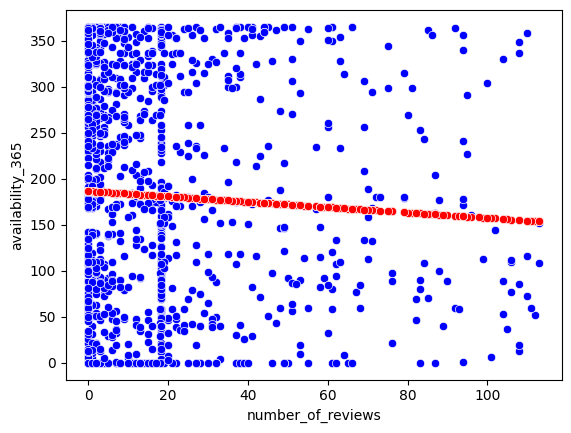

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_private)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_private)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B4 = model_B4.score(X=vars_indep_B4, y=var_dep_B4)
coef_deter_B4

0.002766320015656465

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B4 = np.sqrt(coef_deter_B4)
coef_correl_B4

0.052595817473031686

#### Variables 5

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B5 = data_private[['number_of_reviews']]
var_dep_B5 = data_private['host_acceptance_rate']

In [ ]:
model_B5 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_B5.fit(X=vars_indep_B5, y=var_dep_B5)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_B5 = model_B5.predict(X=data_private[['number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(4,'predicciones_5',y_pred_B5)
data_private.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
9,95.021415,4.845969,94.474792,157.661726,97.624874,2024-06-22,city scrape,Private room & bath - Jamaica Plain,Private bedroom and bathroom in my house in Ja...,Robert,2010-07-20,"Boston, MA",within a few hours,t,"['email', 'phone', 'work_email']",t,t,Jamaica Plain,Private room in home,Private room,1.5 baths,"[""Laundromat nearby"", ""Hammock"", ""Central air ...",t,2024-06-22,2010-08-27,2024-05-05,f,2.0,1.0,1.0,1.0,0,0.0,4.98,4.95,5.00,4.97,4.94,4.93,4.93,0.0,0.59,100.0,78.00,42.31347,-71.11082,29.0,19.0,29.0,28.6,10,19,113,5.0,1.0,0.0,1.0,1.0,1.0,100.0,120,99.0,174986,120.0,120.0,120.0
11,95.021415,4.708764,94.474792,181.282481,94.470520,2024-06-22,city scrape,"Private Room, shared bath in Victorian House/ 1","Location: Beautiful house, convenient and safe...",Hermina,2010-05-05,"Boston, MA",within an hour,f,"['email', 'phone', 'work_email']",t,t,Dorchester,Private room in home,Private room,1.5 shared baths,"[""Smoke alarm"", ""Shampoo"", ""Hangers"", ""Essenti...",t,2024-06-22,2010-09-08,2023-11-05,f,2.0,1.0,3.0,3.0,13,0.0,4.45,4.53,4.44,4.71,4.71,4.83,4.51,0.0,1.98,100.0,89.00,42.29871,-71.05954,1.0,1.0,1.0,1.0,43,73,348,1.0,8.0,2.0,6.0,8.0,8.0,100.0,365,18.1,119019,365.0,365.0,365.0
12,95.021415,4.740615,94.512013,181.282481,94.470520,2024-06-22,city scrape,Room in geographical heart of Hub,"Small, sunny, private room in quiet but urban ...",Michelle,2010-10-06,"Boston, MA",within a few hours,t,"['email', 'phone']",t,t,Roxbury,Private room in rental unit,Private room,1 shared bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2011-01-01,2024-02-29,f,1.0,1.0,1.0,1.0,0,0.0,4.73,4.65,4.57,4.87,4.91,4.83,4.63,0.0,0.88,100.0,96.02,42.32546,-71.08894,29.0,29.0,29.0,29.0,20,50,139,2.0,5.0,1.0,4.0,5.0,6.0,80.0,29,18.1,255183,29.0,29.0,29.0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

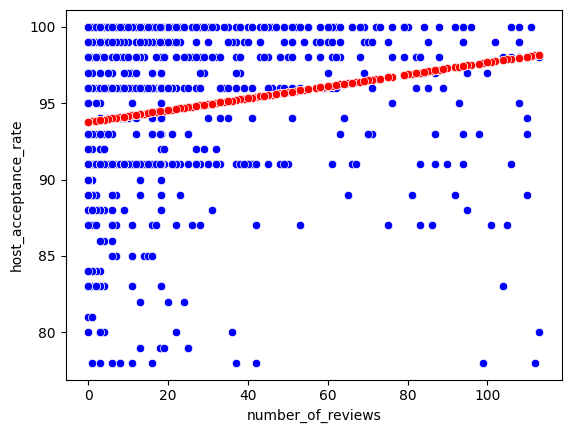

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_private)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_private)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B5 = model_B5.score(X=vars_indep_B5, y=var_dep_B5)
coef_deter_B5

0.03416410504958356

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B5 = np.sqrt(coef_deter_B5)
coef_correl_B5

0.1848353457799226

#### Variables 6

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B6 = data_private[['review_scores_communication']]
var_dep_B6 = data_private['reviews_per_month']

In [ ]:
model_B6 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_B6.fit(X=vars_indep_B6, y=var_dep_B6)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_B6 = model_B6.predict(X=data_private[['review_scores_communication']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(5,'predicciones_6',y_pred_B6)
data_private.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
9,95.021415,4.845969,94.474792,157.661726,97.624874,1.017797,2024-06-22,city scrape,Private room & bath - Jamaica Plain,Private bedroom and bathroom in my house in Ja...,Robert,2010-07-20,"Boston, MA",within a few hours,t,"['email', 'phone', 'work_email']",t,t,Jamaica Plain,Private room in home,Private room,1.5 baths,"[""Laundromat nearby"", ""Hammock"", ""Central air ...",t,2024-06-22,2010-08-27,2024-05-05,f,2.0,1.0,1.0,1.0,0,0.0,4.98,4.95,5.00,4.97,4.94,4.93,4.93,0.0,0.59,100.0,78.00,42.31347,-71.11082,29.0,19.0,29.0,28.6,10,19,113,5.0,1.0,0.0,1.0,1.0,1.0,100.0,120,99.0,174986,120.0,120.0,120.0
11,95.021415,4.708764,94.474792,181.282481,94.470520,1.543243,2024-06-22,city scrape,"Private Room, shared bath in Victorian House/ 1","Location: Beautiful house, convenient and safe...",Hermina,2010-05-05,"Boston, MA",within an hour,f,"['email', 'phone', 'work_email']",t,t,Dorchester,Private room in home,Private room,1.5 shared baths,"[""Smoke alarm"", ""Shampoo"", ""Hangers"", ""Essenti...",t,2024-06-22,2010-09-08,2023-11-05,f,2.0,1.0,3.0,3.0,13,0.0,4.45,4.53,4.44,4.71,4.71,4.83,4.51,0.0,1.98,100.0,89.00,42.29871,-71.05954,1.0,1.0,1.0,1.0,43,73,348,1.0,8.0,2.0,6.0,8.0,8.0,100.0,365,18.1,119019,365.0,365.0,365.0
12,95.021415,4.740615,94.512013,181.282481,94.470520,1.086333,2024-06-22,city scrape,Room in geographical heart of Hub,"Small, sunny, private room in quiet but urban ...",Michelle,2010-10-06,"Boston, MA",within a few hours,t,"['email', 'phone']",t,t,Roxbury,Private room in rental unit,Private room,1 shared bath,"[""Fire extinguisher"", ""Free street parking"", ""...",t,2024-06-22,2011-01-01,2024-02-29,f,1.0,1.0,1.0,1.0,0,0.0,4.73,4.65,4.57,4.87,4.91,4.83,4.63,0.0,0.88,100.0,96.02,42.32546,-71.08894,29.0,29.0,29.0,29.0,20,50,139,2.0,5.0,1.0,4.0,5.0,6.0,80.0,29,18.1,255183,29.0,29.0,29.0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

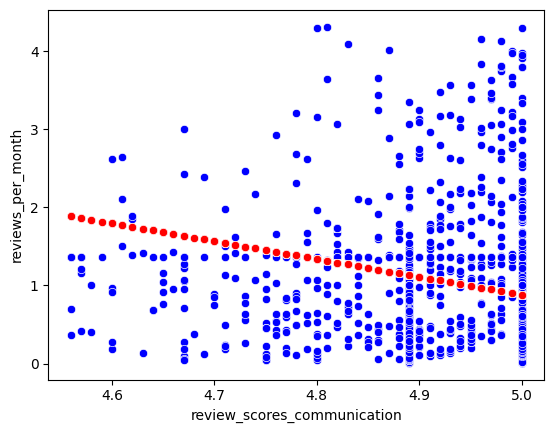

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_private)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_private)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B6 = model_B6.score(X=vars_indep_B6, y=var_dep_B6)
coef_deter_B6

0.06306202629492574

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B6 = np.sqrt(coef_deter_B6)
coef_correl_B6

0.2511215368998162

#### Tabla de Coeficientes de Determinación y Correlación

In [ ]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_B1,coef_deter_B2,coef_deter_B3,coef_deter_B4,coef_deter_B5,coef_deter_B6],
             'Coef_Correl':[coef_correl_B1,coef_correl_B2,coef_correl_B3,coef_correl_B4,coef_correl_B5,coef_correl_B6]}

#Generar con llaves
df_coef_B = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_B

,Coef_Deter,Coef_Correl
Var1,0.040756,0.201881
Var2,0.072072,0.268462
Var3,0.001082,0.032890
Var4,0.002766,0.052596
Var5,0.034164,0.184835
Var6,0.063062,0.251122


### Shared room

In [ ]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_shared = data[data['room_type'] == 'Shared room']
data_shared.shape

(19, 61)

#### Variables 1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C1 = data_shared[['host_response_rate']]
var_dep_C1 = data_shared['host_acceptance_rate']

In [ ]:
model_C1 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_C1.fit(X=vars_indep_C1, y=var_dep_C1)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_C1 = model_C1.predict(X=data_shared[['host_response_rate']])
y_pred_C1

array([91.17182663, 90.53457172, 90.53457172, 90.53457172, 90.53457172,
       91.17182663, 91.17182663, 90.53457172, 91.17182663, 91.17182663,
       91.17182663, 90.6620227 , 90.53457172, 90.6620227 , 90.53457172,
       90.53457172, 91.17182663, 90.53457172, 90.6620227 ])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(0,'predicciones_1',y_pred_C1)
data_shared.head(3)

,predicciones_1,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
128,91.171827,2024-06-22,city scrape,Immaculate space with off street parking!,"Open living room with a ""Sealy posturepedic so...",Stacey,2014-07-15,"Boston, MA",Response time unavailable,f,"['email', 'phone']",t,t,Dorchester,Shared room in home,Shared room,1 shared bath,"[""Gym"", ""Fire extinguisher"", ""Free street park...",t,2024-06-22,2014-07-20,2019-05-19,f,1.0,1.0,1.0,1.0,30,0.0,5.00,5.00,5.00,5.0,5.00,4.83,5.00,0.0,0.02,97.0,91.0,42.28512,-71.07672,29.0,29.0,29.0,29.0,60,90,180,0.0,1.0,0.0,0.0,1.0,2.0,200.0,31,3.0,18165984,1125.0,1125.0,1125.0
386,90.534572,2024-06-22,city scrape,Spacious loft in the quiet suburbs #1,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-04-30,2023-07-01,f,1.0,1.0,1.0,1.0,8,0.0,4.69,4.63,4.82,5.0,4.88,4.63,4.81,0.0,0.16,100.0,85.0,42.34488,-71.15435,60.0,60.0,60.0,60.0,8,9,60,1.0,4.0,0.0,0.0,4.0,4.0,41.0,400,16.0,7324551,400.0,400.0,400.0
410,90.534572,2024-06-22,city scrape,Spacious loft in the quiet suburbs #2,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-05-09,2024-06-21,f,1.0,1.0,1.0,1.0,1,1.0,4.88,4.87,4.82,5.0,4.93,4.80,4.87,0.0,0.16,100.0,85.0,42.34540,-71.15320,30.0,30.0,30.0,30.0,11,19,224,4.0,4.0,0.0,0.0,4.0,4.0,40.0,400,16.0,7324551,400.0,400.0,400.0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

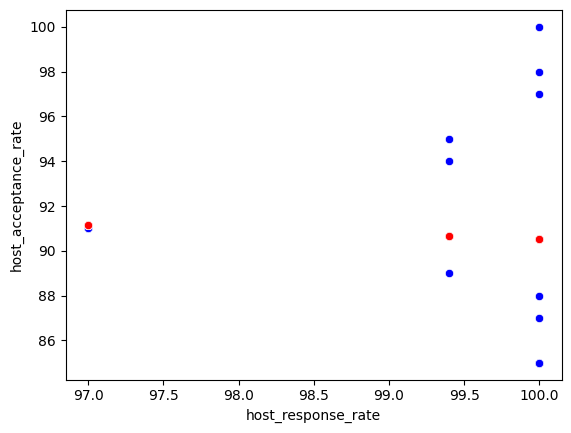

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_shared)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_shared)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C1 = model_C1.score(X=vars_indep_C1, y=var_dep_C1)
coef_deter_C1

0.004562375674907693

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C1 = np.sqrt(coef_deter_C1)
coef_correl_C1

0.06754536012864017

#### Variables 2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C2 = data_shared[['review_scores_cleanliness']]
var_dep_C2 = data_shared['review_scores_location']

In [ ]:
model_C2 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_C2.fit(X=vars_indep_C2, y=var_dep_C2)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_C2 = model_C2.predict(X=data_shared[['review_scores_cleanliness']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(1,'predicciones_2',y_pred_C2)
data_shared.head(3)

,predicciones_1,predicciones_2,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
128,91.171827,4.834334,2024-06-22,city scrape,Immaculate space with off street parking!,"Open living room with a ""Sealy posturepedic so...",Stacey,2014-07-15,"Boston, MA",Response time unavailable,f,"['email', 'phone']",t,t,Dorchester,Shared room in home,Shared room,1 shared bath,"[""Gym"", ""Fire extinguisher"", ""Free street park...",t,2024-06-22,2014-07-20,2019-05-19,f,1.0,1.0,1.0,1.0,30,0.0,5.00,5.00,5.00,5.0,5.00,4.83,5.00,0.0,0.02,97.0,91.0,42.28512,-71.07672,29.0,29.0,29.0,29.0,60,90,180,0.0,1.0,0.0,0.0,1.0,2.0,200.0,31,3.0,18165984,1125.0,1125.0,1125.0
386,90.534572,4.793885,2024-06-22,city scrape,Spacious loft in the quiet suburbs #1,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-04-30,2023-07-01,f,1.0,1.0,1.0,1.0,8,0.0,4.69,4.63,4.82,5.0,4.88,4.63,4.81,0.0,0.16,100.0,85.0,42.34488,-71.15435,60.0,60.0,60.0,60.0,8,9,60,1.0,4.0,0.0,0.0,4.0,4.0,41.0,400,16.0,7324551,400.0,400.0,400.0
410,90.534572,4.793885,2024-06-22,city scrape,Spacious loft in the quiet suburbs #2,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-05-09,2024-06-21,f,1.0,1.0,1.0,1.0,1,1.0,4.88,4.87,4.82,5.0,4.93,4.80,4.87,0.0,0.16,100.0,85.0,42.34540,-71.15320,30.0,30.0,30.0,30.0,11,19,224,4.0,4.0,0.0,0.0,4.0,4.0,40.0,400,16.0,7324551,400.0,400.0,400.0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

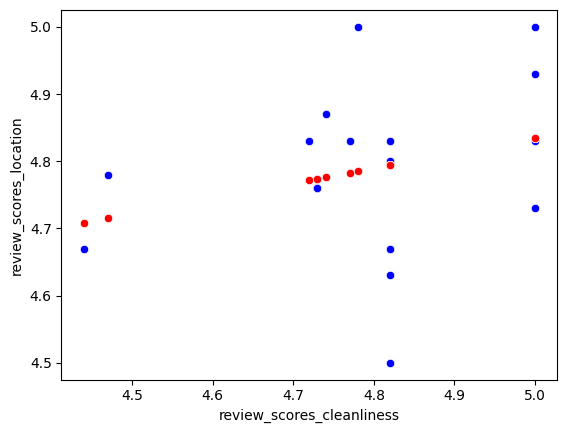

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_shared)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_shared)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C2 = model_C2.score(X=vars_indep_C2, y=var_dep_C2)
coef_deter_C2

0.08114597714393568

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C2 = np.sqrt(coef_deter_C2)
coef_correl_C2

0.2848613296745202

#### Variables 3

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C3 = data_shared[['price']]
var_dep_C3 = data_shared['host_acceptance_rate']

In [ ]:
model_C3 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_C3.fit(X=vars_indep_C3, y=var_dep_C3)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_C3 = model_C3.predict(X=data_shared[['price']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(2,'predicciones_3',y_pred_C3)
data_shared.head(3)

,predicciones_1,predicciones_2,predicciones_3,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
128,91.171827,4.834334,91.026982,2024-06-22,city scrape,Immaculate space with off street parking!,"Open living room with a ""Sealy posturepedic so...",Stacey,2014-07-15,"Boston, MA",Response time unavailable,f,"['email', 'phone']",t,t,Dorchester,Shared room in home,Shared room,1 shared bath,"[""Gym"", ""Fire extinguisher"", ""Free street park...",t,2024-06-22,2014-07-20,2019-05-19,f,1.0,1.0,1.0,1.0,30,0.0,5.00,5.00,5.00,5.0,5.00,4.83,5.00,0.0,0.02,97.0,91.0,42.28512,-71.07672,29.0,29.0,29.0,29.0,60,90,180,0.0,1.0,0.0,0.0,1.0,2.0,200.0,31,3.0,18165984,1125.0,1125.0,1125.0
386,90.534572,4.793885,90.445670,2024-06-22,city scrape,Spacious loft in the quiet suburbs #1,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-04-30,2023-07-01,f,1.0,1.0,1.0,1.0,8,0.0,4.69,4.63,4.82,5.0,4.88,4.63,4.81,0.0,0.16,100.0,85.0,42.34488,-71.15435,60.0,60.0,60.0,60.0,8,9,60,1.0,4.0,0.0,0.0,4.0,4.0,41.0,400,16.0,7324551,400.0,400.0,400.0
410,90.534572,4.793885,90.442014,2024-06-22,city scrape,Spacious loft in the quiet suburbs #2,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-05-09,2024-06-21,f,1.0,1.0,1.0,1.0,1,1.0,4.88,4.87,4.82,5.0,4.93,4.80,4.87,0.0,0.16,100.0,85.0,42.34540,-71.15320,30.0,30.0,30.0,30.0,11,19,224,4.0,4.0,0.0,0.0,4.0,4.0,40.0,400,16.0,7324551,400.0,400.0,400.0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

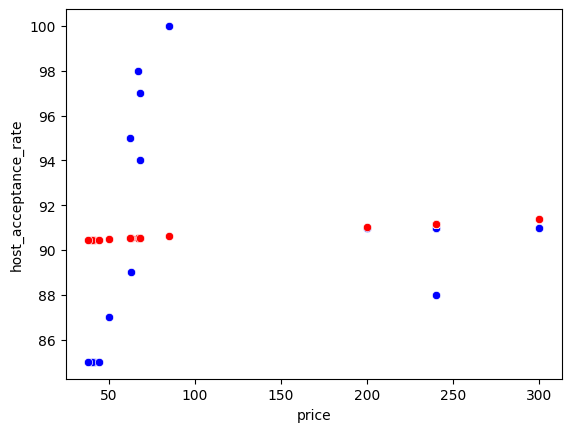

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_shared)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_shared)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C3 = model_C3.score(X=vars_indep_C3, y=var_dep_C3)
coef_deter_C3

0.006144100951919973

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C3 = np.sqrt(coef_deter_C3)
coef_correl_C3

0.07838431572655319

#### Variables 4

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C4 = data_shared[['number_of_reviews']]
var_dep_C4 = data_shared['availability_365']

In [ ]:
model_C4 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_C4.fit(X=vars_indep_C4, y=var_dep_C4)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_C4 = model_C4.predict(X=data_shared[['number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(3,'predicciones_4',y_pred_C4)
data_shared.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
128,91.171827,4.834334,91.026982,107.168285,2024-06-22,city scrape,Immaculate space with off street parking!,"Open living room with a ""Sealy posturepedic so...",Stacey,2014-07-15,"Boston, MA",Response time unavailable,f,"['email', 'phone']",t,t,Dorchester,Shared room in home,Shared room,1 shared bath,"[""Gym"", ""Fire extinguisher"", ""Free street park...",t,2024-06-22,2014-07-20,2019-05-19,f,1.0,1.0,1.0,1.0,30,0.0,5.00,5.00,5.00,5.0,5.00,4.83,5.00,0.0,0.02,97.0,91.0,42.28512,-71.07672,29.0,29.0,29.0,29.0,60,90,180,0.0,1.0,0.0,0.0,1.0,2.0,200.0,31,3.0,18165984,1125.0,1125.0,1125.0
386,90.534572,4.793885,90.445670,164.430511,2024-06-22,city scrape,Spacious loft in the quiet suburbs #1,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-04-30,2023-07-01,f,1.0,1.0,1.0,1.0,8,0.0,4.69,4.63,4.82,5.0,4.88,4.63,4.81,0.0,0.16,100.0,85.0,42.34488,-71.15435,60.0,60.0,60.0,60.0,8,9,60,1.0,4.0,0.0,0.0,4.0,4.0,41.0,400,16.0,7324551,400.0,400.0,400.0
410,90.534572,4.793885,90.442014,164.430511,2024-06-22,city scrape,Spacious loft in the quiet suburbs #2,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-05-09,2024-06-21,f,1.0,1.0,1.0,1.0,1,1.0,4.88,4.87,4.82,5.0,4.93,4.80,4.87,0.0,0.16,100.0,85.0,42.34540,-71.15320,30.0,30.0,30.0,30.0,11,19,224,4.0,4.0,0.0,0.0,4.0,4.0,40.0,400,16.0,7324551,400.0,400.0,400.0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

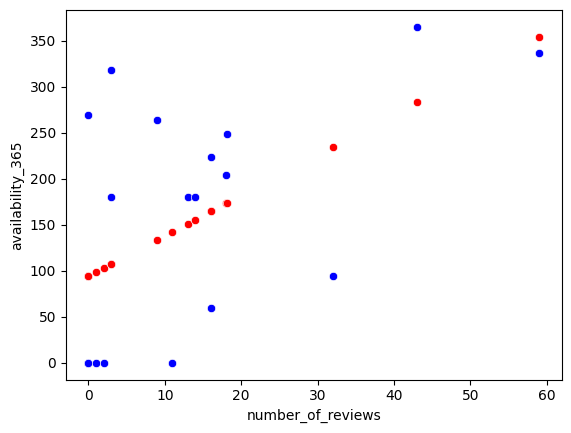

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_shared)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_shared)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C4 = model_C4.score(X=vars_indep_C4, y=var_dep_C4)
coef_deter_C4

0.2947867635607193

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C4 = np.sqrt(coef_deter_C4)
coef_correl_C4

0.5429426890204152

#### Variables 5

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C5 = data_shared[['number_of_reviews']]
var_dep_C5 = data_shared['host_acceptance_rate']

In [ ]:
model_C5 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_C5.fit(X=vars_indep_C5, y=var_dep_C5)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_C5 = model_C5.predict(X=data_shared[['number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(4,'predicciones_5',y_pred_C5)
data_shared.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
128,91.171827,4.834334,91.026982,107.168285,89.371115,2024-06-22,city scrape,Immaculate space with off street parking!,"Open living room with a ""Sealy posturepedic so...",Stacey,2014-07-15,"Boston, MA",Response time unavailable,f,"['email', 'phone']",t,t,Dorchester,Shared room in home,Shared room,1 shared bath,"[""Gym"", ""Fire extinguisher"", ""Free street park...",t,2024-06-22,2014-07-20,2019-05-19,f,1.0,1.0,1.0,1.0,30,0.0,5.00,5.00,5.00,5.0,5.00,4.83,5.00,0.0,0.02,97.0,91.0,42.28512,-71.07672,29.0,29.0,29.0,29.0,60,90,180,0.0,1.0,0.0,0.0,1.0,2.0,200.0,31,3.0,18165984,1125.0,1125.0,1125.0
386,90.534572,4.793885,90.445670,164.430511,91.113207,2024-06-22,city scrape,Spacious loft in the quiet suburbs #1,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-04-30,2023-07-01,f,1.0,1.0,1.0,1.0,8,0.0,4.69,4.63,4.82,5.0,4.88,4.63,4.81,0.0,0.16,100.0,85.0,42.34488,-71.15435,60.0,60.0,60.0,60.0,8,9,60,1.0,4.0,0.0,0.0,4.0,4.0,41.0,400,16.0,7324551,400.0,400.0,400.0
410,90.534572,4.793885,90.442014,164.430511,91.113207,2024-06-22,city scrape,Spacious loft in the quiet suburbs #2,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-05-09,2024-06-21,f,1.0,1.0,1.0,1.0,1,1.0,4.88,4.87,4.82,5.0,4.93,4.80,4.87,0.0,0.16,100.0,85.0,42.34540,-71.15320,30.0,30.0,30.0,30.0,11,19,224,4.0,4.0,0.0,0.0,4.0,4.0,40.0,400,16.0,7324551,400.0,400.0,400.0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

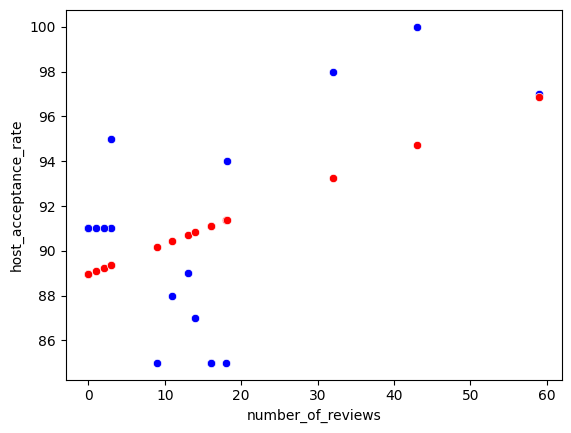

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_shared)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_shared)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C5 = model_C5.score(X=vars_indep_C5, y=var_dep_C5)
coef_deter_C5

0.2275420347057615

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C5 = np.sqrt(coef_deter_C5)
coef_correl_C5

0.4770136630179072

#### Variables 6

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C6 = data_shared[['review_scores_communication']]
var_dep_C6 = data_shared['reviews_per_month']

In [ ]:
model_C6 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_C6.fit(X=vars_indep_C6, y=var_dep_C6)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_C6 = model_C6.predict(X=data_shared[['review_scores_communication']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(5,'predicciones_6',y_pred_C6)
data_shared.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
128,91.171827,4.834334,91.026982,107.168285,89.371115,0.683352,2024-06-22,city scrape,Immaculate space with off street parking!,"Open living room with a ""Sealy posturepedic so...",Stacey,2014-07-15,"Boston, MA",Response time unavailable,f,"['email', 'phone']",t,t,Dorchester,Shared room in home,Shared room,1 shared bath,"[""Gym"", ""Fire extinguisher"", ""Free street park...",t,2024-06-22,2014-07-20,2019-05-19,f,1.0,1.0,1.0,1.0,30,0.0,5.00,5.00,5.00,5.0,5.00,4.83,5.00,0.0,0.02,97.0,91.0,42.28512,-71.07672,29.0,29.0,29.0,29.0,60,90,180,0.0,1.0,0.0,0.0,1.0,2.0,200.0,31,3.0,18165984,1125.0,1125.0,1125.0
386,90.534572,4.793885,90.445670,164.430511,91.113207,1.158908,2024-06-22,city scrape,Spacious loft in the quiet suburbs #1,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-04-30,2023-07-01,f,1.0,1.0,1.0,1.0,8,0.0,4.69,4.63,4.82,5.0,4.88,4.63,4.81,0.0,0.16,100.0,85.0,42.34488,-71.15435,60.0,60.0,60.0,60.0,8,9,60,1.0,4.0,0.0,0.0,4.0,4.0,41.0,400,16.0,7324551,400.0,400.0,400.0
410,90.534572,4.793885,90.442014,164.430511,91.113207,0.960760,2024-06-22,city scrape,Spacious loft in the quiet suburbs #2,The top floor of my gigantic family house is a...,Bo,2013-07-07,"Boston, MA",within an hour,t,"['email', 'phone']",t,t,Brighton,Shared room in home,Shared room,1 shared bath,"[""Board games"", ""Game console: PS3"", ""Laundrom...",t,2024-06-22,2016-05-09,2024-06-21,f,1.0,1.0,1.0,1.0,1,1.0,4.88,4.87,4.82,5.0,4.93,4.80,4.87,0.0,0.16,100.0,85.0,42.34540,-71.15320,30.0,30.0,30.0,30.0,11,19,224,4.0,4.0,0.0,0.0,4.0,4.0,40.0,400,16.0,7324551,400.0,400.0,400.0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

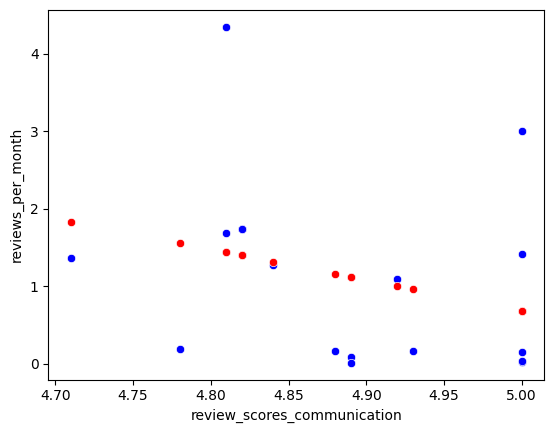

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_shared)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_shared)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C6 = model_C6.score(X=vars_indep_C6, y=var_dep_C6)
coef_deter_C6

0.09106948767440759

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C6 = np.sqrt(coef_deter_C6)
coef_correl_C6

0.3017772153003066

#### Tabla de Coeficientes de Determinación y Correlación

In [ ]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_C1,coef_deter_C2,coef_deter_C3,coef_deter_C4,coef_deter_C5,coef_deter_C6],
             'Coef_Correl':[coef_correl_C1,coef_correl_C2,coef_correl_C3,coef_correl_C4,coef_correl_C5,coef_correl_C6]}

#Generar con llaves
df_coef_C = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_C

,Coef_Deter,Coef_Correl
Var1,0.004562,0.067545
Var2,0.081146,0.284861
Var3,0.006144,0.078384
Var4,0.294787,0.542943
Var5,0.227542,0.477014
Var6,0.091069,0.301777


### Hotel room

In [ ]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_hotel = data[data['room_type'] == 'Hotel room']
data_hotel.shape

(43, 61)

#### Variables 1

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D1 = data_hotel[['host_response_rate']]
var_dep_D1 = data_hotel['host_acceptance_rate']

In [ ]:
model_D1 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_D1.fit(X=vars_indep_D1, y=var_dep_D1)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_D1 = model_D1.predict(X=data_hotel[['host_response_rate']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(0,'predicciones_1',y_pred_D1)
data_hotel.head(3)

,predicciones_1,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
1047,91.776512,2024-06-22,city scrape,"Charlesmark, boutique hotel room in Copley Square",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-11-22,2023-02-12,t,2.0,1.0,1.0,1.0,9,0.0,4.76,4.79,4.81,4.88,4.85,4.90,4.75,0.0,1.24,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,1125,84.0,224820689,1125.0,1125.0,1125.0
1053,91.776512,2024-06-22,city scrape,"A Boutique Hotel Room in Copley, Charlesmark H...",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-12-02,2022-03-05,t,2.0,1.0,1.0,1.0,9,0.0,4.77,4.83,4.87,4.96,4.87,4.97,4.61,0.0,1.33,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,28,90.0,224820689,28.0,28.0,28.0
1054,91.776512,2024-06-22,city scrape,Queen Size Bed Boutique Hotel @ The Charlesmark,Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2019-01-06,2024-02-29,t,2.0,1.0,1.0,1.0,9,0.0,4.85,4.88,4.93,5.00,4.95,5.00,4.73,0.0,0.60,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,1.0,5.0,0.0,0.0,5.0,5.0,338.0,28,40.0,224820689,28.0,28.0,28.0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

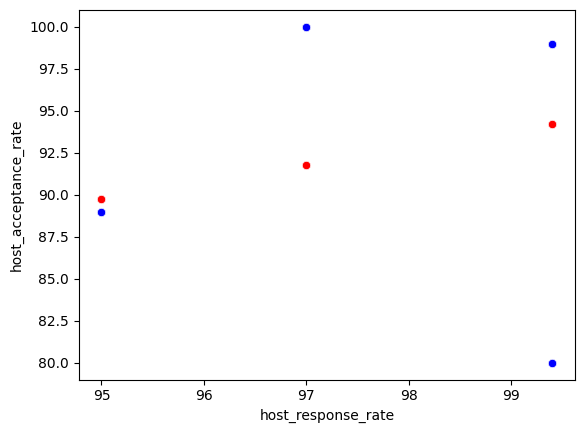

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_hotel)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_hotel)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D1 = model_D1.score(X=vars_indep_D1, y=var_dep_D1)
coef_deter_D1

0.10864196821762817

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D1 = np.sqrt(coef_deter_D1)
coef_correl_D1

0.32960881089198474

#### Variables 2

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D2 = data_hotel[['review_scores_cleanliness']]
var_dep_D2 = data_hotel['review_scores_location']

In [ ]:
model_D2 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_D2.fit(X=vars_indep_D2, y=var_dep_D2)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_D2 = model_D2.predict(X=data_hotel[['review_scores_cleanliness']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(1,'predicciones_2',y_pred_D2)
data_hotel.head(3)

,predicciones_1,predicciones_2,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
1047,91.776512,4.828070,2024-06-22,city scrape,"Charlesmark, boutique hotel room in Copley Square",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-11-22,2023-02-12,t,2.0,1.0,1.0,1.0,9,0.0,4.76,4.79,4.81,4.88,4.85,4.90,4.75,0.0,1.24,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,1125,84.0,224820689,1125.0,1125.0,1125.0
1053,91.776512,4.877911,2024-06-22,city scrape,"A Boutique Hotel Room in Copley, Charlesmark H...",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-12-02,2022-03-05,t,2.0,1.0,1.0,1.0,9,0.0,4.77,4.83,4.87,4.96,4.87,4.97,4.61,0.0,1.33,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,28,90.0,224820689,28.0,28.0,28.0
1054,91.776512,4.927752,2024-06-22,city scrape,Queen Size Bed Boutique Hotel @ The Charlesmark,Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2019-01-06,2024-02-29,t,2.0,1.0,1.0,1.0,9,0.0,4.85,4.88,4.93,5.00,4.95,5.00,4.73,0.0,0.60,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,1.0,5.0,0.0,0.0,5.0,5.0,338.0,28,40.0,224820689,28.0,28.0,28.0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

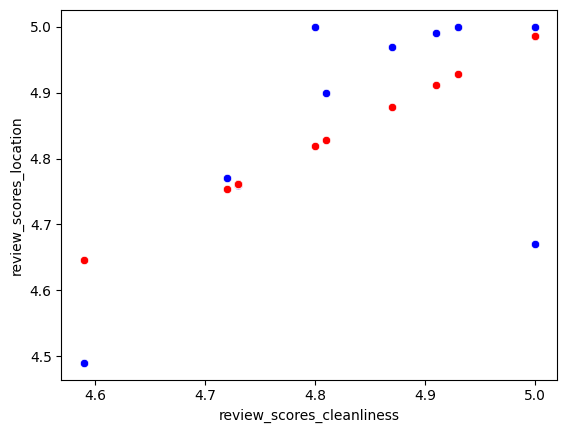

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_hotel)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_hotel)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D2 = model_D2.score(X=vars_indep_D2, y=var_dep_D2)
coef_deter_D2

0.47909715435146116

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D2 = np.sqrt(coef_deter_D2)
coef_correl_D2

0.6921684436258715

#### Variables 3

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D3 = data_hotel[['price']]
var_dep_D3 = data_hotel['host_acceptance_rate']

In [ ]:
model_D3 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_D3.fit(X=vars_indep_D3, y=var_dep_D3)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_D3 = model_D3.predict(X=data_hotel[['price']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(2,'predicciones_3',y_pred_D3)
data_hotel.head(3)

,predicciones_1,predicciones_2,predicciones_3,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
1047,91.776512,4.828070,101.251194,2024-06-22,city scrape,"Charlesmark, boutique hotel room in Copley Square",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-11-22,2023-02-12,t,2.0,1.0,1.0,1.0,9,0.0,4.76,4.79,4.81,4.88,4.85,4.90,4.75,0.0,1.24,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,1125,84.0,224820689,1125.0,1125.0,1125.0
1053,91.776512,4.877911,101.251194,2024-06-22,city scrape,"A Boutique Hotel Room in Copley, Charlesmark H...",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-12-02,2022-03-05,t,2.0,1.0,1.0,1.0,9,0.0,4.77,4.83,4.87,4.96,4.87,4.97,4.61,0.0,1.33,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,28,90.0,224820689,28.0,28.0,28.0
1054,91.776512,4.927752,103.072591,2024-06-22,city scrape,Queen Size Bed Boutique Hotel @ The Charlesmark,Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2019-01-06,2024-02-29,t,2.0,1.0,1.0,1.0,9,0.0,4.85,4.88,4.93,5.00,4.95,5.00,4.73,0.0,0.60,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,1.0,5.0,0.0,0.0,5.0,5.0,338.0,28,40.0,224820689,28.0,28.0,28.0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

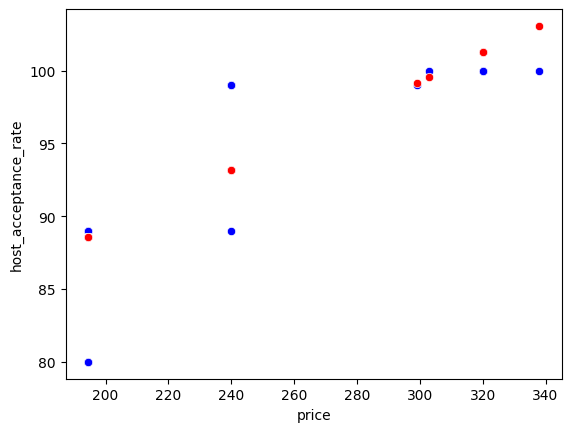

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_hotel)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_hotel)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D3 = model_D3.score(X=vars_indep_D3, y=var_dep_D3)
coef_deter_D3

0.6736428291331056

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D3 = np.sqrt(coef_deter_D3)
coef_correl_D3

0.8207574727854177

#### Variables 4

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D4 = data_hotel[['number_of_reviews']]
var_dep_D4 = data_hotel['availability_365']

In [ ]:
model_D4 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_D4.fit(X=vars_indep_D4, y=var_dep_D4)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_D4 = model_D4.predict(X=data_hotel[['number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(3,'predicciones_4',y_pred_D4)
data_hotel.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
1047,91.776512,4.828070,101.251194,291.077834,2024-06-22,city scrape,"Charlesmark, boutique hotel room in Copley Square",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-11-22,2023-02-12,t,2.0,1.0,1.0,1.0,9,0.0,4.76,4.79,4.81,4.88,4.85,4.90,4.75,0.0,1.24,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,1125,84.0,224820689,1125.0,1125.0,1125.0
1053,91.776512,4.877911,101.251194,300.132006,2024-06-22,city scrape,"A Boutique Hotel Room in Copley, Charlesmark H...",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-12-02,2022-03-05,t,2.0,1.0,1.0,1.0,9,0.0,4.77,4.83,4.87,4.96,4.87,4.97,4.61,0.0,1.33,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,28,90.0,224820689,28.0,28.0,28.0
1054,91.776512,4.927752,103.072591,224.680569,2024-06-22,city scrape,Queen Size Bed Boutique Hotel @ The Charlesmark,Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2019-01-06,2024-02-29,t,2.0,1.0,1.0,1.0,9,0.0,4.85,4.88,4.93,5.00,4.95,5.00,4.73,0.0,0.60,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,1.0,5.0,0.0,0.0,5.0,5.0,338.0,28,40.0,224820689,28.0,28.0,28.0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

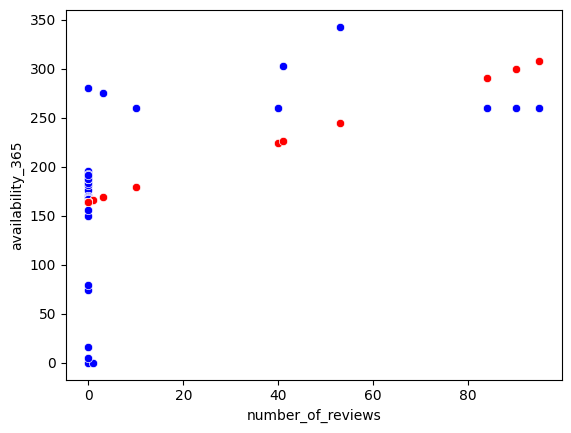

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_hotel)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_hotel)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D4 = model_D4.score(X=vars_indep_D4, y=var_dep_D4)
coef_deter_D4

0.2488648872221204

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D4 = np.sqrt(coef_deter_D4)
coef_correl_D4

0.49886359580763195

#### Variables 5

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D5 = data_hotel[['number_of_reviews']]
var_dep_D5 = data_hotel['host_acceptance_rate']

In [ ]:
model_D5 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_D5.fit(X=vars_indep_D5, y=var_dep_D5)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_D5 = model_D5.predict(X=data_hotel[['number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(4,'predicciones_5',y_pred_D5)
data_hotel.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
1047,91.776512,4.828070,101.251194,291.077834,101.290735,2024-06-22,city scrape,"Charlesmark, boutique hotel room in Copley Square",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-11-22,2023-02-12,t,2.0,1.0,1.0,1.0,9,0.0,4.76,4.79,4.81,4.88,4.85,4.90,4.75,0.0,1.24,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,1125,84.0,224820689,1125.0,1125.0,1125.0
1053,91.776512,4.877911,101.251194,300.132006,102.136748,2024-06-22,city scrape,"A Boutique Hotel Room in Copley, Charlesmark H...",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-12-02,2022-03-05,t,2.0,1.0,1.0,1.0,9,0.0,4.77,4.83,4.87,4.96,4.87,4.97,4.61,0.0,1.33,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,28,90.0,224820689,28.0,28.0,28.0
1054,91.776512,4.927752,103.072591,224.680569,95.086644,2024-06-22,city scrape,Queen Size Bed Boutique Hotel @ The Charlesmark,Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2019-01-06,2024-02-29,t,2.0,1.0,1.0,1.0,9,0.0,4.85,4.88,4.93,5.00,4.95,5.00,4.73,0.0,0.60,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,1.0,5.0,0.0,0.0,5.0,5.0,338.0,28,40.0,224820689,28.0,28.0,28.0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

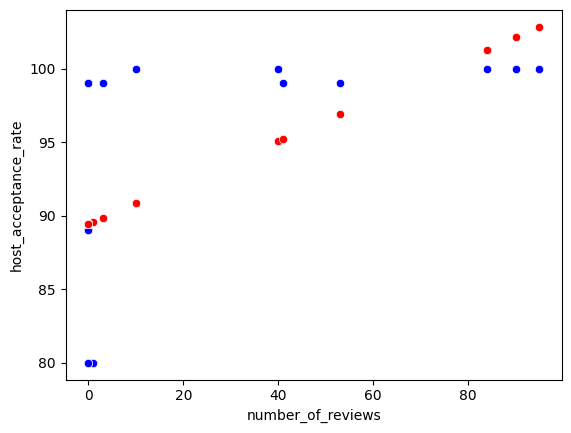

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_hotel)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_hotel)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D5 = model_D5.score(X=vars_indep_D5, y=var_dep_D5)
coef_deter_D5

0.43399720105743633

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D5 = np.sqrt(coef_deter_D5)
coef_correl_D5

0.6587846393605701

#### Variables 6

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D6 = data_hotel[['review_scores_communication']]
var_dep_D6 = data_hotel['reviews_per_month']

In [ ]:
model_D6 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_D6.fit(X=vars_indep_D6, y=var_dep_D6)

LinearRegression()

In [ ]:
#Predecimos los valores a partir de la variable
y_pred_D6 = model_D6.predict(X=data_hotel[['review_scores_communication']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(5,'predicciones_6',y_pred_D6)
data_hotel.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
1047,91.776512,4.828070,101.251194,291.077834,101.290735,1.480303,2024-06-22,city scrape,"Charlesmark, boutique hotel room in Copley Square",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-11-22,2023-02-12,t,2.0,1.0,1.0,1.0,9,0.0,4.76,4.79,4.81,4.88,4.85,4.90,4.75,0.0,1.24,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,1125,84.0,224820689,1125.0,1125.0,1125.0
1053,91.776512,4.877911,101.251194,300.132006,102.136748,1.428577,2024-06-22,city scrape,"A Boutique Hotel Room in Copley, Charlesmark H...",Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2018-12-02,2022-03-05,t,2.0,1.0,1.0,1.0,9,0.0,4.77,4.83,4.87,4.96,4.87,4.97,4.61,0.0,1.33,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,0.0,5.0,0.0,0.0,5.0,5.0,320.0,28,90.0,224820689,28.0,28.0,28.0
1054,91.776512,4.927752,103.072591,224.680569,95.086644,1.221672,2024-06-22,city scrape,Queen Size Bed Boutique Hotel @ The Charlesmark,Originally built in 1886 as a private residenc...,Charlesmark,2018-11-08,"Boston, MA",Response time unavailable,t,"['email', 'phone']",t,t,Back Bay,Room in boutique hotel,Hotel room,1 private bath,"[""Fire extinguisher"", ""Elevator"", ""Carbon mono...",t,2024-06-22,2019-01-06,2024-02-29,t,2.0,1.0,1.0,1.0,9,0.0,4.85,4.88,4.93,5.00,4.95,5.00,4.73,0.0,0.60,97.0,100.0,42.35006,-71.07858,1.0,1.0,1.0,1.0,28,41,260,1.0,5.0,0.0,0.0,5.0,5.0,338.0,28,40.0,224820689,28.0,28.0,28.0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

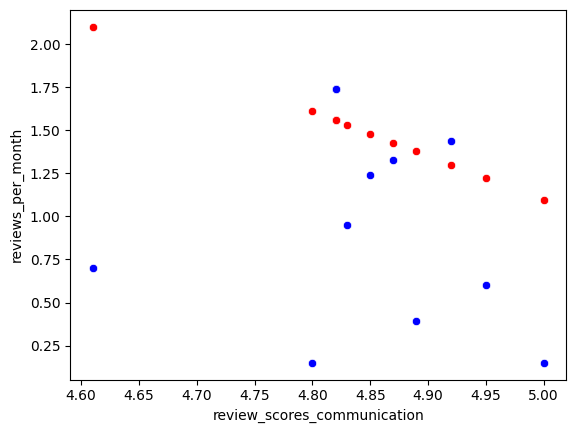

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_hotel)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_hotel)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D6 = model_D6.score(X=vars_indep_D6, y=var_dep_D6)
coef_deter_D6

0.08490201103899986

In [ ]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D6 = np.sqrt(coef_deter_D6)
coef_correl_D6

0.29137949660022383

#### Tabla de Coeficientes de Determinación y Correlación

In [ ]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_D1,coef_deter_D2,coef_deter_D3,coef_deter_D4,coef_deter_D5,coef_deter_D6],
             'Coef_Correl':[coef_correl_D1,coef_correl_D2,coef_correl_D3,coef_correl_D4,coef_correl_D5,coef_correl_D6]}

#Generar con llaves
df_coef_D = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_D

,Coef_Deter,Coef_Correl
Var1,0.108642,0.329609
Var2,0.479097,0.692168
Var3,0.673643,0.820757
Var4,0.248865,0.498864
Var5,0.433997,0.658785
Var6,0.084902,0.291379


## Regresión Lineal Múltiple

Para poder analizar la Regresión Lineal Múltiple, debemos crear el mejor modelo para cada una de las siguientes 10 variables: host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month.

Para hacerlo, debemos encontrar aquellas variables cuantitativas que tienen la mejor correlación. Por lo que primero se deberá convertir el Frame a solo cuantitativas, para posteriormente realizar los procesos pertinentes.

### Convertir Frame a solo Cuantitativo

In [ ]:
#Se crea una copia del frame original
data_mult = data.copy()

#### Datos Categoricos convertir a Cuantitativos

Entre las 10 variables a modelar se enucentran 2 que son categoricas, host_is_superhost y room_type. Por lo que primero se deben convertir sus datos a numericos

In [ ]:
#Se detectan los valores unicos de la columna
np.unique(data_mult['host_is_superhost'])

array(['f', 't'], dtype=object)

In [ ]:
#Se reemplazan los datos categoricos a numerico
data_mult['host_is_superhost'] = data_mult['host_is_superhost'].replace('f',0)
data_mult['host_is_superhost'] = data_mult['host_is_superhost'].replace('t',1)
data_mult['host_is_superhost'] = data_mult['host_is_superhost'].astype(int)

<ipython-input-209-537e1b3b3b9f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_mult['host_is_superhost'] = data_mult['host_is_superhost'].replace('t',1)


In [ ]:
#Se detectan los valores unicos de la columna
np.unique(data_mult['room_type'])

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [ ]:
#Se reemplazan los datos categoricos a numerico
data_mult['room_type'] = data_mult['room_type'].replace('Entire home/apt',1)
data_mult['room_type'] = data_mult['room_type'].replace('Hotel room',2)
data_mult['room_type'] = data_mult['room_type'].replace('Private room',3)
data_mult['room_type'] = data_mult['room_type'].replace('Shared room',4)
data_mult['room_type'] = data_mult['room_type'].astype(int)

<ipython-input-211-682027192985>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_mult['room_type'] = data_mult['room_type'].replace('Shared room',4)


In [ ]:
#Se detectan los valores unicos de la columna
np.unique(data_mult['instant_bookable'])

array(['f', 't'], dtype=object)

In [ ]:
#Se reemplazan los datos categoricos a numerico
data_mult['instant_bookable'] = data_mult['instant_bookable'].replace('f',0)
data_mult['instant_bookable'] = data_mult['instant_bookable'].replace('t',1)
data_mult['instant_bookable'] = data_mult['instant_bookable'].astype(int)

<ipython-input-213-d33f4f03bbab>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_mult['instant_bookable'] = data_mult['instant_bookable'].replace('t',1)


#### Conservar Únicamente columnas cuantitativas

In [ ]:
#Se eliminan columnas innecesarias
data_mult.drop(['last_scraped','source','name','description','host_name','host_since','host_location','host_response_time','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','bathrooms_text','amenities','has_availability','calendar_last_scraped','first_review','last_review'],axis=1,inplace=True)
data_mult.head(3)

,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


In [ ]:
#Verificar que todas las columnas sean cuantitativas
data_mult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_is_superhost                             4325 non-null   int64  
 1   room_type                                     4325 non-null   int64  
 2   instant_bookable                              4325 non-null   int64  
 3   accommodates                                  4325 non-null   float64
 4   bathrooms                                     4325 non-null   float64
 5   bedrooms                                      4325 non-null   float64
 6   beds                                          4325 non-null   float64
 7   availability_30                               4325 non-null   int64  
 8   number_of_reviews_l30d                        4325 non-null   float64
 9   review_scores_rating                          4325 non-null   f

### Crear Modelos

En primer lugar, para facilitar la busqueda de variables que sirvan correctamente como variables independientes para cada modelo se utiliza un 'heat map' el cuál nos muestre las variables con la mejor correlación.

In [ ]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_mult.corr()
corr_factors

,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
host_is_superhost,1.000000,0.000244,-0.104960,0.103920,NaN,0.059850,-0.007370,-0.085181,0.220428,0.291952,0.255354,0.254029,0.238739,0.267051,0.011359,0.252060,NaN,0.097798,0.206688,0.119946,-0.090926,0.004200,-0.087545,-0.131714,-0.213079,-0.125323,-0.076515,-0.055939,-0.089373,0.220978,-0.275046,-0.159807,0.065230,-0.243163,-0.160095,-0.060251,-0.155924,0.241903,-0.103512,0.029386,0.000574,0.016051
room_type,0.000244,1.000000,-0.094276,-0.488757,NaN,-0.124017,-0.207242,0.106553,-0.138526,-0.020155,-0.021231,-0.086024,-0.010082,-0.034101,-0.171361,0.064347,NaN,-0.150224,-0.119073,-0.267639,-0.224946,-0.097844,-0.066967,-0.051905,0.187891,-0.095070,0.079692,0.051051,-0.057813,-0.126451,-0.222079,-0.344596,0.589038,0.030390,-0.244095,-0.478477,-0.107839,-0.043229,0.007006,-0.068739,-0.056894,-0.063022
instant_bookable,-0.104960,-0.094276,1.000000,0.036871,NaN,-0.080561,-0.037969,0.104427,0.025923,-0.108204,-0.116215,-0.087338,-0.126783,-0.134108,-0.015509,-0.136378,NaN,0.083316,0.100245,0.260187,0.136801,0.009270,-0.071767,-0.061781,-0.178806,-0.037757,0.115825,0.115398,0.091117,0.031901,0.155938,0.093636,0.046396,0.023256,0.072960,0.144402,0.067657,-0.053925,0.161127,0.008639,0.109373,0.066461
accommodates,0.103920,-0.488757,0.036871,1.000000,NaN,0.583912,0.478003,-0.015329,0.149403,0.102037,0.085840,0.125246,0.028842,0.065189,0.046559,0.057736,NaN,0.082314,0.009338,0.118409,0.042628,0.042337,-0.071580,-0.097739,-0.207954,-0.075514,-0.025341,-0.013153,-0.015195,0.105864,0.002292,0.205785,-0.250707,-0.134355,0.101173,0.413256,-0.009193,0.094100,-0.014247,0.015058,0.030042,0.026196
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.059850,-0.124017,-0.080561,0.583912,NaN,1.000000,0.431677,-0.056293,0.030015,0.094429,0.061649,0.065703,0.013875,0.059341,-0.075267,0.097241,NaN,-0.012752,-0.054943,-0.097189,-0.104886,0.008935,-0.019026,-0.034514,0.035773,-0.034822,-0.081540,-0.077853,-0.044183,-0.037447,-0.174647,-0.034399,-0.082348,-0.042192,-0.046036,0.189012,-0.048776,0.018252,-0.034767,-0.006180,-0.012217,-0.011769
beds,-0.007370,-0.207242,-0.037969,0.478003,NaN,0.431677,1.000000,-0.117970,-0.011772,0.035145,0.036622,0.038193,0.015356,0.034400,0.010863,0.041903,NaN,-0.033039,-0.150726,-0.052637,0.027594,-0.013393,0.001195,-0.020349,0.069370,-0.014430,-0.144115,-0.156792,-0.164911,-0.040855,-0.087830,0.035907,-0.119076,-0.071332,0.015358,0.342296,0.084671,0.009079,-0.060952,0.065569,0.098740,0.092578
availability_30,-0.085181,0.106553,0.104427,-0.015329,NaN,-0.056293,-0.117970,1.000000,0.046232,-0.082777,-0.086916,-0.051584,-0.083684,-0.079125,-0.040098,-0.067098,NaN,0.038924,0.036706,0.082370,-0.051401,0.031736,-0.179763,-0.175057,-0.105330,-0.188084,0.930538,0.851242,0.390738,0.054245,0.103806,0.005808,0.115009,0.035438,0.071362,-0.031644,-0.111360,0.012433,0.093194,-0.155250,-0.077039,-0.108575
number_of_reviews_l30d,0.220428,-0.138526,0.025923,0.149403,NaN,0.030015,-0.011772,0.046232,1.000000,0.088840,0.072959,0.134532,0.066516,0.118705,0.042957,0.033431,NaN,0.473

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)
corr_factors1

,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
host_is_superhost,1.000000,0.000244,0.104960,0.103920,NaN,0.059850,0.007370,0.085181,0.220428,0.291952,0.255354,0.254029,0.238739,0.267051,0.011359,0.252060,NaN,0.097798,0.206688,0.119946,0.090926,0.004200,0.087545,0.131714,0.213079,0.125323,0.076515,0.055939,0.089373,0.220978,0.275046,0.159807,0.065230,0.243163,0.160095,0.060251,0.155924,0.241903,0.103512,0.029386,0.000574,0.016051
room_type,0.000244,1.000000,0.094276,0.488757,NaN,0.124017,0.207242,0.106553,0.138526,0.020155,0.021231,0.086024,0.010082,0.034101,0.171361,0.064347,NaN,0.150224,0.119073,0.267639,0.224946,0.097844,0.066967,0.051905,0.187891,0.095070,0.079692,0.051051,0.057813,0.126451,0.222079,0.344596,0.589038,0.030390,0.244095,0.478477,0.107839,0.043229,0.007006,0.068739,0.056894,0.063022
instant_bookable,0.104960,0.094276,1.000000,0.036871,NaN,0.080561,0.037969,0.104427,0.025923,0.108204,0.116215,0.087338,0.126783,0.134108,0.015509,0.136378,NaN,0.083316,0.100245,0.260187,0.136801,0.009270,0.071767,0.061781,0.178806,0.037757,0.115825,0.115398,0.091117,0.031901,0.155938,0.093636,0.046396,0.023256,0.072960,0.144402,0.067657,0.053925,0.161127,0.008639,0.109373,0.066461
accommodates,0.103920,0.488757,0.036871,1.000000,NaN,0.583912,0.478003,0.015329,0.149403,0.102037,0.085840,0.125246,0.028842,0.065189,0.046559,0.057736,NaN,0.082314,0.009338,0.118409,0.042628,0.042337,0.071580,0.097739,0.207954,0.075514,0.025341,0.013153,0.015195,0.105864,0.002292,0.205785,0.250707,0.134355,0.101173,0.413256,0.009193,0.094100,0.014247,0.015058,0.030042,0.026196
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.059850,0.124017,0.080561,0.583912,NaN,1.000000,0.431677,0.056293,0.030015,0.094429,0.061649,0.065703,0.013875,0.059341,0.075267,0.097241,NaN,0.012752,0.054943,0.097189,0.104886,0.008935,0.019026,0.034514,0.035773,0.034822,0.081540,0.077853,0.044183,0.037447,0.174647,0.034399,0.082348,0.042192,0.046036,0.189012,0.048776,0.018252,0.034767,0.006180,0.012217,0.011769
beds,0.007370,0.207242,0.037969,0.478003,NaN,0.431677,1.000000,0.117970,0.011772,0.035145,0.036622,0.038193,0.015356,0.034400,0.010863,0.041903,NaN,0.033039,0.150726,0.052637,0.027594,0.013393,0.001195,0.020349,0.069370,0.014430,0.144115,0.156792,0.164911,0.040855,0.087830,0.035907,0.119076,0.071332,0.015358,0.342296,0.084671,0.009079,0.060952,0.065569,0.098740,0.092578
availability_30,0.085181,0.106553,0.104427,0.015329,NaN,0.056293,0.117970,1.000000,0.046232,0.082777,0.086916,0.051584,0.083684,0.079125,0.040098,0.067098,NaN,0.038924,0.036706,0.082370,0.051401,0.031736,0.179763,0.175057,0.105330,0.188084,0.930538,0.851242,0.390738,0.054245,0.103806,0.005808,0.115009,0.035438,0.071362,0.031644,0.111360,0.012433,0.093194,0.155250,0.077039,0.108575
number_of_reviews_l30d,0.220428,0.138526,0.025923,0.149403,NaN,0.030015,0.011772,0.046232,1.000000,0.088840,0.072959,0.134532,0.066516,0.118705,0.042957,0.033431,NaN,0.473663,0.209661,0.261674,0.014272,0.060243,0.470298,0.492760,0.421254,0.465280,0.089218,0.106395,0.008804,0.526084,0.142426,0.086587,0.056196,0.034

<Axes: >

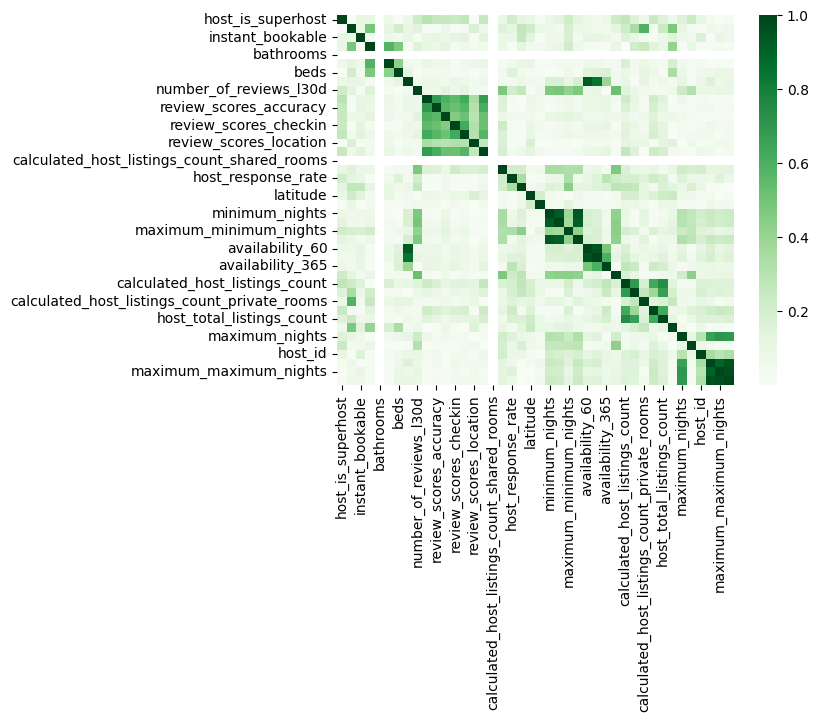

In [ ]:
#Ajustemos el mapa del calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corr_factors1, cmap='Greens')
Heat_Map

#### Regresión y Graficación

A partir de la Heat Map anterior y de los datos de correlación, encontramos las mejores variables para cada una de las 10 columnas establecidas:

instant_bookable, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month

##### Host is Superhost

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_1 = data_mult[['review_scores_rating', 'review_scores_communication', 'review_scores_value','calculated_host_listings_count','host_listings_count','number_of_reviews']]
var_dep_1 = data_mult['host_is_superhost']

In [ ]:
model_1 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_1.fit(X=vars_indep_1, y=var_dep_1)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_1 = model_1.predict(X=data_mult[['review_scores_rating', 'review_scores_communication', 'review_scores_value','calculated_host_listings_count','host_listings_count','number_of_reviews']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(0,'predicciones_1',y_pred_1)
data_mult.head(3)

,predicciones_1,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='review_scores_rating', ylabel='host_is_superhost'>

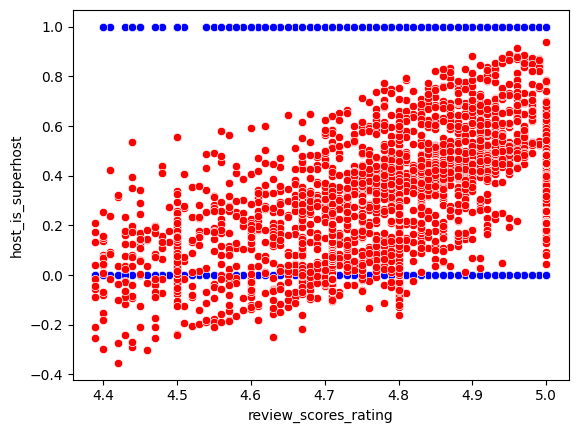

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color='blue', data=data_mult)
sns.scatterplot(x='review_scores_rating', y='predicciones_1', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_1 = model_1.score(X=vars_indep_1, y=var_dep_1)
coef_deter_1

0.19713921404733337

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_1 = np.sqrt(coef_deter_1)
coef_correl_1

0.4440036194079203

##### Room Type

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_2 = data_mult[['accommodates', 'calculated_host_listings_count_private_rooms', 'price']]
var_dep_2 = data_mult['room_type']

In [ ]:
model_2 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_2.fit(X=vars_indep_2, y=var_dep_2)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_2 = model_2.predict(X=data_mult[['accommodates', 'calculated_host_listings_count_private_rooms', 'price']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(1,'predicciones_2',y_pred_2)
data_mult.head(3)

,predicciones_1,predicciones_2,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='accommodates', ylabel='room_type'>

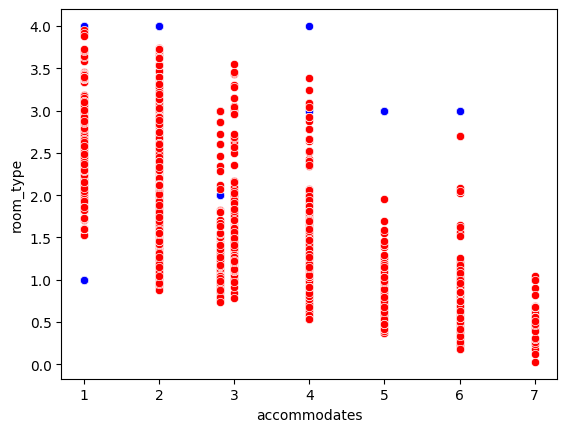

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='accommodates', y='room_type', color='blue', data=data_mult)
sns.scatterplot(x='accommodates', y='predicciones_2', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_2 = model_2.score(X=vars_indep_2, y=var_dep_2)
coef_deter_2

0.5218722028832379

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_2 = np.sqrt(coef_deter_2)
coef_correl_2

0.7224072278730591

##### Instant Bookable

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_mult[['host_acceptance_rate', 'maximum_minimum_nights', 'calculated_host_listings_count','host_id']]
var_dep_3 = data_mult['instant_bookable']

In [ ]:
model_3 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_3.fit(X=vars_indep_3, y=var_dep_3)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_3 = model_3.predict(X=data_mult[['host_acceptance_rate', 'maximum_minimum_nights', 'calculated_host_listings_count','host_id']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(2,'predicciones_3',y_pred_3)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='host_acceptance_rate', ylabel='instant_bookable'>

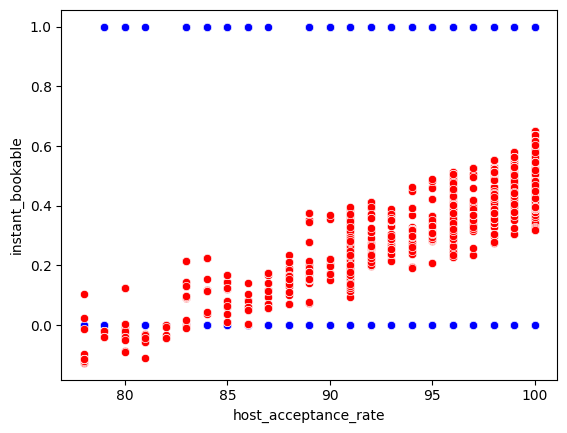

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='host_acceptance_rate', y='instant_bookable', color='blue', data=data_mult)
sns.scatterplot(x='host_acceptance_rate', y='predicciones_3', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_3 = model_3.score(X=vars_indep_3, y=var_dep_3)
coef_deter_3

0.0940641186762512

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_3 = np.sqrt(coef_deter_3)
coef_correl_3

0.3066987425410336

##### Accomodates

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_4 = data_mult[['instant_bookable', 'bedrooms', 'beds','price']]
var_dep_4 = data_mult['accommodates']

In [ ]:
model_4 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_4.fit(X=vars_indep_4, y=var_dep_4)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_4 = model_4.predict(X=data_mult[['instant_bookable', 'bedrooms', 'beds','price']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(3,'predicciones_4',y_pred_4)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,2.061083,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,2.120208,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1.845844,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='bedrooms', ylabel='accommodates'>

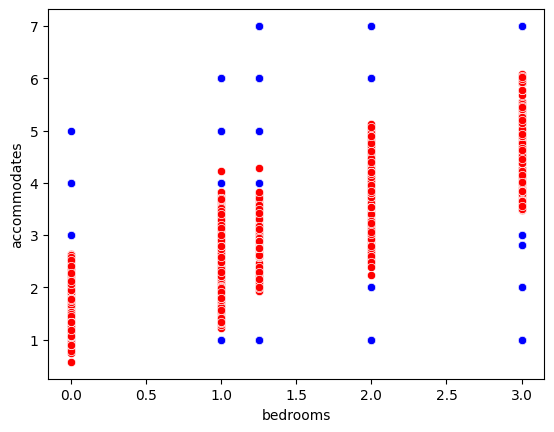

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='bedrooms', y='accommodates', color='blue', data=data_mult)
sns.scatterplot(x='bedrooms', y='predicciones_4', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_4 = model_4.score(X=vars_indep_4, y=var_dep_4)
coef_deter_4

0.4659128997456208

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_4 = np.sqrt(coef_deter_4)
coef_correl_4

0.6825781272100805

##### Bedrooms

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_5 = data_mult[['accommodates', 'beds', 'calculated_host_listings_count','price']]
var_dep_5 = data_mult['bedrooms']

In [ ]:
model_5 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_5.fit(X=vars_indep_5, y=var_dep_5)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_5 = model_5.predict(X=data_mult[['accommodates', 'beds', 'calculated_host_listings_count','price']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(4,'predicciones_5',y_pred_5)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,2.061083,1.061154,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,2.120208,1.006393,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1.845844,1.751667,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='beds', ylabel='bedrooms'>

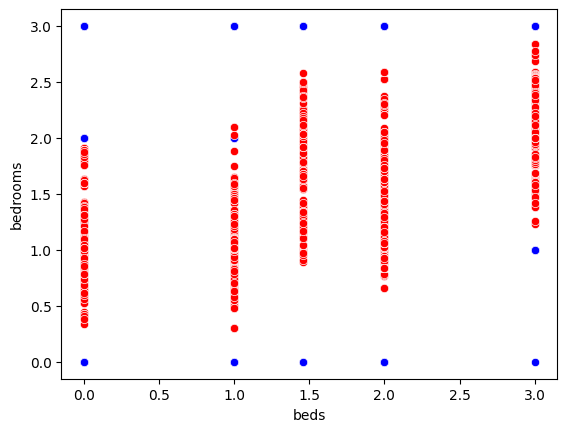

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='beds', y='bedrooms', color='blue', data=data_mult)
sns.scatterplot(x='beds', y='predicciones_5', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_5 = model_5.score(X=vars_indep_5, y=var_dep_5)
coef_deter_5

0.4006465492279869

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_5 = np.sqrt(coef_deter_5)
coef_correl_5

0.632966467696344

##### Review Scores Value

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_6 = data_mult[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication']]
var_dep_6 = data_mult['review_scores_value']

In [ ]:
model_6 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_6.fit(X=vars_indep_6, y=var_dep_6)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_6 = model_6.predict(X=data_mult[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(5,'predicciones_6',y_pred_6)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,2.061083,1.061154,4.856273,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,2.120208,1.006393,4.712216,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1.845844,1.751667,4.708637,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

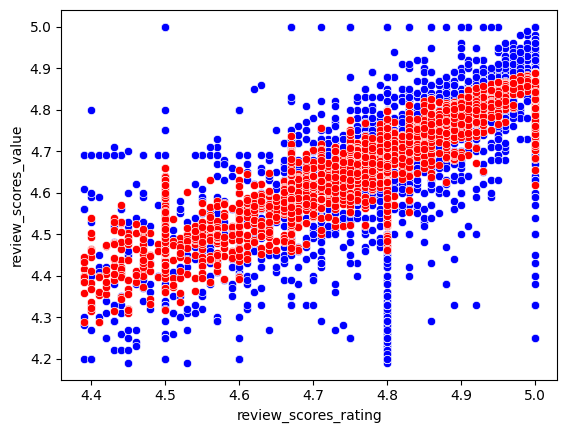

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color='blue', data=data_mult)
sns.scatterplot(x='review_scores_rating', y='predicciones_6', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_6 = model_6.score(X=vars_indep_6, y=var_dep_6)
coef_deter_6

0.5359739607021407

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_6 = np.sqrt(coef_deter_6)
coef_correl_6

0.7321024250076902

##### Reviews Per Month

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_7 = data_mult[['number_of_reviews_l30d', 'minimum_nights', 'minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','number_of_reviews_ltm']]
var_dep_7 = data_mult['reviews_per_month']

In [ ]:
model_7 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_7.fit(X=vars_indep_7, y=var_dep_7)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_7 = model_7.predict(X=data_mult[['number_of_reviews_l30d', 'minimum_nights', 'minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','number_of_reviews_ltm']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(6,'predicciones_7',y_pred_7)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,predicciones_7,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,2.061083,1.061154,4.856273,0.928594,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,2.120208,1.006393,4.712216,1.276530,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1.845844,1.751667,4.708637,1.245176,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='number_of_reviews_l30d', ylabel='reviews_per_month'>

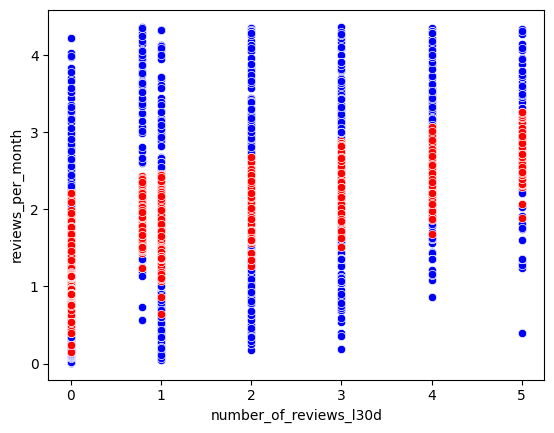

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color='blue', data=data_mult)
sns.scatterplot(x='number_of_reviews_l30d', y='predicciones_7', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_7 = model_7.score(X=vars_indep_7, y=var_dep_7)
coef_deter_7

0.3042317590708059

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_7 = np.sqrt(coef_deter_7)
coef_correl_7

0.5515720796693809

##### Host Acceptance Rate

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_8 = data_mult[['number_of_reviews_l30d', 'host_response_rate', 'maximum_minimum_nights']]
var_dep_8 = data_mult['host_acceptance_rate']

In [ ]:
model_8 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_8.fit(X=vars_indep_8, y=var_dep_8)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_8 = model_8.predict(X=data_mult[['number_of_reviews_l30d', 'host_response_rate', 'maximum_minimum_nights']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(7,'predicciones_8',y_pred_8)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,predicciones_7,predicciones_8,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,2.061083,1.061154,4.856273,0.928594,95.733308,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,2.120208,1.006393,4.712216,1.276530,97.460972,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1.845844,1.751667,4.708637,1.245176,97.460972,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

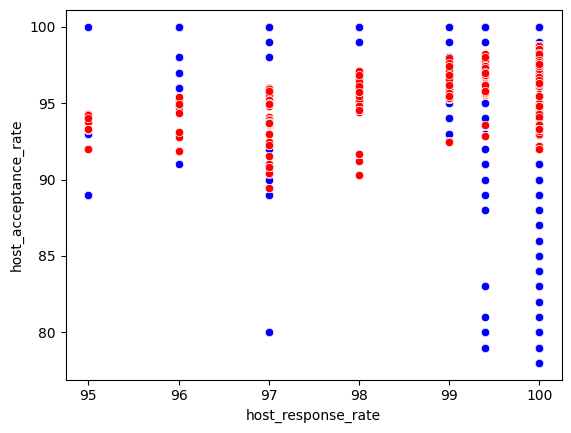

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_mult)
sns.scatterplot(x='host_response_rate', y='predicciones_8', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_8 = model_8.score(X=vars_indep_8, y=var_dep_8)
coef_deter_8

0.24116444300417017

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_8 = np.sqrt(coef_deter_8)
coef_correl_8

0.4910849651579349

##### Host Total Listings Count

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_9 = data_mult[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'host_listings_count']]
var_dep_9 = data_mult['host_total_listings_count']

In [ ]:
model_9 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_9.fit(X=vars_indep_9, y=var_dep_9)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_9 = model_9.predict(X=data_mult[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'host_listings_count']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(8,'predicciones_9',y_pred_9)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,predicciones_7,predicciones_8,predicciones_9,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,2.061083,1.061154,4.856273,0.928594,95.733308,6.222008,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,2.120208,1.006393,4.712216,1.276530,97.460972,24.711580,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1.845844,1.751667,4.708637,1.245176,97.460972,24.711580,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='calculated_host_listings_count', ylabel='host_total_listings_count'>

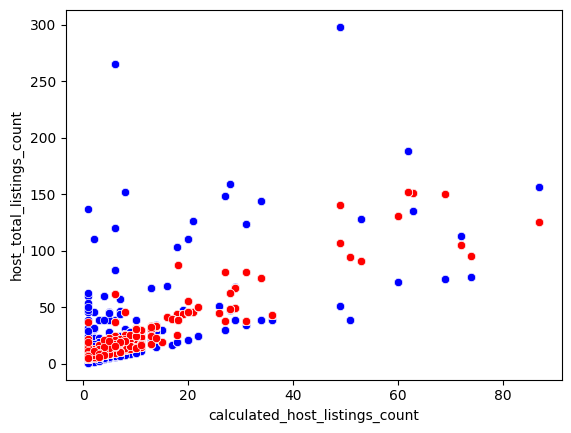

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='calculated_host_listings_count', y='host_total_listings_count', color='blue', data=data_mult)
sns.scatterplot(x='calculated_host_listings_count', y='predicciones_9', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_9 = model_9.score(X=vars_indep_9, y=var_dep_9)
coef_deter_9

0.6493312017745787

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_9 = np.sqrt(coef_deter_9)
coef_correl_9

0.8058108970314181

##### Price

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_10 = data_mult[['room_type', 'accommodates', 'beds']]
var_dep_10 = data_mult['price']

In [ ]:
model_10 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_10.fit(X=vars_indep_10, y=var_dep_10)

LinearRegression()

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_10 = model_10.predict(X=data_mult[['room_type', 'accommodates', 'beds']])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(9,'predicciones_10',y_pred_10)
data_mult.head(3)

,predicciones_1,predicciones_2,predicciones_3,predicciones_4,predicciones_5,predicciones_6,predicciones_7,predicciones_8,predicciones_9,predicciones_10,host_is_superhost,room_type,instant_bookable,accommodates,bathrooms,bedrooms,beds,availability_30,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate,host_acceptance_rate,latitude,longitude,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_60,availability_90,availability_365,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,host_listings_count,host_total_listings_count,price,maximum_nights,number_of_reviews,host_id,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
0,0.528967,1.736110,0.281665,2.061083,1.061154,4.856273,0.928594,95.733308,6.222008,198.091629,1,1,0,2.0,1.0,1.0,1.0,0,0.0,4.96,5.00,4.96,5.00,4.96,4.84,4.88,0.0,0.23,99.4,96.02,42.36413,-71.02991,29.0,29.0,29.0,29.0,12,42,317,1.0,1.0,1.0,0.0,4.0,5.0,125.0,1125,25.0,4804,1125.0,1125.0,1125.0
1,0.332507,1.698427,0.385151,2.120208,1.006393,4.712216,1.276530,97.460972,24.711580,198.091629,1,1,0,2.0,1.0,1.0,1.0,6,0.0,4.79,4.88,4.90,4.95,4.89,4.56,4.75,0.0,0.66,100.0,99.00,42.32844,-71.09581,3.0,1.0,3.0,3.0,18,31,112,5.0,10.0,10.0,0.0,11.0,14.0,139.0,90,18.1,8229,1125.0,1125.0,1125.0
2,0.374710,1.242785,0.385151,1.845844,1.751667,4.708637,1.245176,97.460972,24.711580,239.678753,1,1,0,4.0,1.0,0.0,2.0,4,0.0,4.81,4.82,4.87,4.90,4.95,4.52,4.72,0.0,0.71,100.0,99.00,42.32802,-71.09387,3.0,1.0,3.0,2.9,9,19,79,4.0,10.0,10.0,0.0,11.0,14.0,179.0,730,18.1,8229,730.0,730.0,730.0


<Axes: xlabel='accommodates', ylabel='price'>

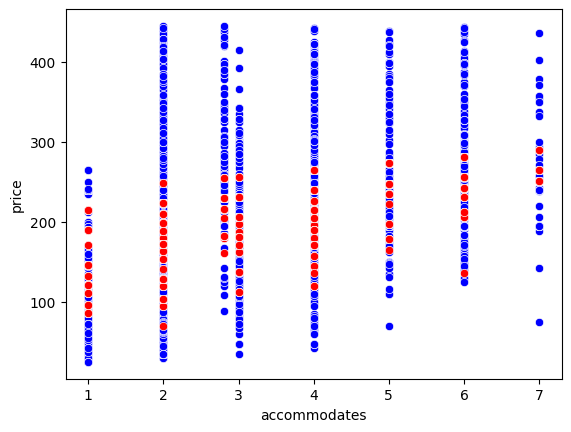

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='accommodates', y='price', color='blue', data=data_mult)
sns.scatterplot(x='accommodates', y='predicciones_10', color='red', data=data_mult)

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_10 = model_10.score(X=vars_indep_10, y=var_dep_10)
coef_deter_10

0.30213785475049504

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_10 = np.sqrt(coef_deter_10)
coef_correl_10

0.5496706784525577

##### Tabla de Correlaciones

In [ ]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_1,coef_deter_2,coef_deter_3,coef_deter_4,coef_deter_5,coef_deter_6,coef_deter_7,coef_deter_8,coef_deter_9,coef_deter_10],
             'Coef_Correl':[coef_correl_1,coef_correl_2,coef_correl_3,coef_correl_4,coef_correl_5,coef_correl_6,coef_correl_7,coef_correl_8,coef_correl_9,coef_correl_10]}

#Generar con llaves
df_coef_mult = pd.DataFrame(coef_data,index=['RegresionMult_1','RegresionMult_2','RegresionMult_3','RegresionMult_4','RegresionMult_5','RegresionMult_6','RegresionMult_7','RegresionMult_8','RegresionMult_9','RegresionMult_10'])
df_coef_mult

,Coef_Deter,Coef_Correl
RegresionMult_1,0.197139,0.444004
RegresionMult_2,0.521872,0.722407
RegresionMult_3,0.094064,0.306699
RegresionMult_4,0.465913,0.682578
RegresionMult_5,0.400647,0.632966
RegresionMult_6,0.535974,0.732102
RegresionMult_7,0.304232,0.551572
RegresionMult_8,0.241164,0.491085
RegresionMult_9,0.649331,0.805811
RegresionMult_10,0.302138,0.549671
